# Part I.II - Obtain App Store Reviews

In [47]:
## Import necessary libraries

# retrieves app info from App Store
from itunes_app_scraper.scraper import AppStoreScraper
# retrieves reviews from App Store
from app_store_scraper import AppStore

# pretty print data structures
from pprint import pprint

# for storing in MongoDB
import pymongo
from pymongo import MongoClient

import datetime as dt
from tzlocal import get_localzone

import random
import time

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
## Read in file containing app details, 
  ## need the app IDs for scraping stores
app_df = pd.read_csv('Data/mha_app_info.csv')
app_df.head()

,app_name,iOS,iOS_revs,iOS_app_name,iOS_app_id,android,android_revs,android_appID
0,Aloe Bud,1,3000,aloe-bud,1318382054,0,0,NaN
1,Aura,1,22100,aura-meditation-sleep,1114223104,1,10400,com.aurahealth
2,BetterHelp,1,32400,betterhelp-online-counseling,995252384,1,15300,com.betterhelp
3,Breathe2Relax,1,200,breathe2relax,425720246,1,1100,org.t2health.breathe2relax
4,Breathwrk: Breathing Exercises,1,10400,breathwrk,1481804500,0,0,NaN


In [3]:
## Store list of app ids and app names to loop through for App Store
app_store_ids = list(app_df['iOS_app_id'])
app_store_names = list(app_df['iOS_app_name'])

In [4]:
## Check number of apps found in App Store
len(app_store_ids)

64

## Set Up MongoDB

In [5]:
## Set up Mongo client
client = MongoClient(host='localhost', port=27018)

In [6]:
## Database for project
mha_proj_db = client['mha_proj_db']

In [7]:
## Set up new collection within project db
app_store_rvws = mha_proj_db['app_store_rvws']

## Scrape Reviews for Each App
### Scrape Reviews from App Store

In [8]:
app_store_names[:4]

['aloe-bud',
 'aura-meditation-sleep',
 'betterhelp-online-counseling',
 'breathe2relax']

In [9]:
app_store_ids[:4]

[1318382054, 1114223104, 995252384, 425720246]

In [10]:
## Set up loop to go through first 4 apps
for app_name, app_id in zip(app_store_names[:4], app_store_ids[:4]):
    
    start = dt.datetime.now(tz=get_localzone())
    fmt= "%m/%d/%y - %T %p"
    
    print('---'*20)
    print('---'*20)    
    print(f'***** {app_name} started at {start.strftime(fmt)}')
    print()
    
    app_ = AppStore(country='us', app_name=app_name, app_id=app_id)
    
    # grab reviews posted since February 28, 2020 and limit to 10,000 reviews
    app_.review(how_many=10000,
                after=dt.datetime(2020, 2, 28),
                sleep=random.randint(20,30))
    
    reviews = app_.reviews
    
    # add keys to store information about which app each review is for
    for rvw in reviews:
        rvw['app_name'] = app_name
        rvw['app_id'] = app_id
    
    
    print(f'Done scraping {app_name}. Scraped a total of {app_.reviews_count} reviews.\n')
    
    # insert reviews into collection
    app_store_rvws.insert_many(reviews)
    
    end = dt.datetime.now(tz=get_localzone())
    
    print(f'Successfully inserted {app_name} reviews into collection at {end.strftime(fmt)}.\n')
    print(f'Time elapsed for {app_name}: {end-start}')
    print('---'*20)
    print('---'*20)
    print('\n')
    
    time.sleep(random.randint(5,10))

------------------------------------------------------------
------------------------------------------------------------
***** aloe-bud started at 03/23/21 - 13:18:47 PM



2021-03-23 13:18:49,465 [INFO] Base - Initialised: AppStore('us', 'aloe-bud', 1318382054)
2021-03-23 13:18:49,467 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/aloe-bud/id1318382054
2021-03-23 13:19:19,683 [INFO] Base - [id:1318382054] Fetched 20 reviews (20 fetched in total)
2021-03-23 13:20:20,159 [INFO] Base - [id:1318382054] Fetched 60 reviews (60 fetched in total)
2021-03-23 13:21:20,609 [INFO] Base - [id:1318382054] Fetched 66 reviews (66 fetched in total)
2021-03-23 13:22:21,159 [INFO] Base - [id:1318382054] Fetched 68 reviews (68 fetched in total)
2021-03-23 13:23:21,737 [INFO] Base - [id:1318382054] Fetched 69 reviews (69 fetched in total)
2021-03-23 13:23:52,221 [INFO] Base - [id:1318382054] Fetched 73 reviews (73 fetched in total)


Done scraping aloe-bud. Scraped a total of 73 reviews.

Successfully inserted aloe-bud reviews into collection at 03/23/21 - 13:23:52 PM.

Time elapsed for aloe-bud: 0:05:05.310393
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** aura-meditation-sleep started at 03/23/21 - 13:23:58 PM



2021-03-23 13:23:59,443 [INFO] Base - Initialised: AppStore('us', 'aura-meditation-sleep', 1114223104)
2021-03-23 13:23:59,444 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/aura-meditation-sleep/id1114223104
2021-03-23 13:24:25,686 [INFO] Base - [id:1114223104] Fetched 6 reviews (6 fetched in total)
2021-03-23 13:25:18,181 [INFO] Base - [id:1114223104] Fetched 19 reviews (19 fetched in total)
2021-03-23 13:26:10,719 [INFO] Base - [id:1114223104] Fetched 30 reviews (30 fetched in total)
2021-03-23 13:27:03,239 [INFO] Base - [id:1114223104] Fetched 41 reviews (41 fetched in total)
2021-03-23 13:27:55,677 [INFO] Base - [id:1114223104] Fetched 47 reviews (47 fetched in total)
2021-03-23 13:28:48,255 [INFO] Base - [id:1114223104] Fetched 51 reviews (51 fetched in total)
2021-03-23 13:29:40,815 [INFO] Base - [id:1114223104] Fetched 66 reviews (66 fetched in total)
2021-03-23 13:30:33,335 [INFO] Base - [id:1114223104] Fetched 78 reviews (78 fetched in total)
2021-03

2021-03-23 14:37:08,031 [INFO] Base - [id:1114223104] Fetched 736 reviews (736 fetched in total)
2021-03-23 14:38:00,585 [INFO] Base - [id:1114223104] Fetched 743 reviews (743 fetched in total)
2021-03-23 14:38:53,101 [INFO] Base - [id:1114223104] Fetched 751 reviews (751 fetched in total)
2021-03-23 14:39:45,543 [INFO] Base - [id:1114223104] Fetched 759 reviews (759 fetched in total)
2021-03-23 14:40:38,173 [INFO] Base - [id:1114223104] Fetched 765 reviews (765 fetched in total)
2021-03-23 14:41:30,708 [INFO] Base - [id:1114223104] Fetched 775 reviews (775 fetched in total)
2021-03-23 14:42:23,372 [INFO] Base - [id:1114223104] Fetched 786 reviews (786 fetched in total)
2021-03-23 14:43:15,959 [INFO] Base - [id:1114223104] Fetched 792 reviews (792 fetched in total)
2021-03-23 14:44:08,478 [INFO] Base - [id:1114223104] Fetched 803 reviews (803 fetched in total)
2021-03-23 14:45:00,995 [INFO] Base - [id:1114223104] Fetched 808 reviews (808 fetched in total)
2021-03-23 14:45:53,402 [INFO]

Done scraping aura-meditation-sleep. Scraped a total of 1154 reviews.

Successfully inserted aura-meditation-sleep reviews into collection at 03/23/21 - 15:46:28 PM.

Time elapsed for aura-meditation-sleep: 2:22:30.160155
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** betterhelp-online-counseling started at 03/23/21 - 15:46:33 PM



2021-03-23 15:46:35,135 [INFO] Base - Initialised: AppStore('us', 'betterhelp-online-counseling', 995252384)
2021-03-23 15:46:35,136 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/betterhelp-online-counseling/id995252384
2021-03-23 15:46:59,386 [INFO] Base - [id:995252384] Fetched 14 reviews (14 fetched in total)
2021-03-23 15:47:47,883 [INFO] Base - [id:995252384] Fetched 37 reviews (37 fetched in total)
2021-03-23 15:48:36,331 [INFO] Base - [id:995252384] Fetched 63 reviews (63 fetched in total)
2021-03-23 15:49:24,814 [INFO] Base - [id:995252384] Fetched 88 reviews (88 fetched in total)
2021-03-23 15:50:13,306 [INFO] Base - [id:995252384] Fetched 114 reviews (114 fetched in total)
2021-03-23 15:51:01,788 [INFO] Base - [id:995252384] Fetched 141 reviews (141 fetched in total)
2021-03-23 15:51:50,325 [INFO] Base - [id:995252384] Fetched 165 reviews (165 fetched in total)
2021-03-23 15:52:38,916 [INFO] Base - [id:995252384] Fetched 195 reviews (195 fetched in 

2021-03-23 16:54:22,797 [INFO] Base - [id:995252384] Fetched 2210 reviews (2210 fetched in total)
2021-03-23 16:55:11,298 [INFO] Base - [id:995252384] Fetched 2228 reviews (2228 fetched in total)
2021-03-23 16:55:59,716 [INFO] Base - [id:995252384] Fetched 2249 reviews (2249 fetched in total)
2021-03-23 16:56:48,202 [INFO] Base - [id:995252384] Fetched 2281 reviews (2281 fetched in total)
2021-03-23 16:57:36,650 [INFO] Base - [id:995252384] Fetched 2298 reviews (2298 fetched in total)
2021-03-23 16:58:25,198 [INFO] Base - [id:995252384] Fetched 2328 reviews (2328 fetched in total)
2021-03-23 16:59:13,779 [INFO] Base - [id:995252384] Fetched 2349 reviews (2349 fetched in total)
2021-03-23 17:00:02,299 [INFO] Base - [id:995252384] Fetched 2368 reviews (2368 fetched in total)
2021-03-23 17:00:50,745 [INFO] Base - [id:995252384] Fetched 2406 reviews (2406 fetched in total)
2021-03-23 17:01:40,247 [INFO] Base - [id:995252384] Fetched 2421 reviews (2421 fetched in total)
2021-03-23 17:02:28,

2021-03-23 18:00:36,887 [INFO] Base - [id:995252384] Fetched 4317 reviews (4317 fetched in total)
2021-03-23 18:01:25,325 [INFO] Base - [id:995252384] Fetched 4346 reviews (4346 fetched in total)
2021-03-23 18:02:13,893 [INFO] Base - [id:995252384] Fetched 4386 reviews (4386 fetched in total)
2021-03-23 18:03:02,417 [INFO] Base - [id:995252384] Fetched 4411 reviews (4411 fetched in total)
2021-03-23 18:03:50,984 [INFO] Base - [id:995252384] Fetched 4430 reviews (4430 fetched in total)
2021-03-23 18:04:39,581 [INFO] Base - [id:995252384] Fetched 4456 reviews (4456 fetched in total)
2021-03-23 18:05:28,211 [INFO] Base - [id:995252384] Fetched 4485 reviews (4485 fetched in total)
2021-03-23 18:06:17,788 [INFO] Base - [id:995252384] Fetched 4507 reviews (4507 fetched in total)
2021-03-23 18:07:06,277 [INFO] Base - [id:995252384] Fetched 4533 reviews (4533 fetched in total)
2021-03-23 18:07:54,780 [INFO] Base - [id:995252384] Fetched 4568 reviews (4568 fetched in total)
2021-03-23 18:08:43,

Done scraping betterhelp-online-counseling. Scraped a total of 5936 reviews.

Successfully inserted betterhelp-online-counseling reviews into collection at 03/23/21 - 19:01:27 PM.

Time elapsed for betterhelp-online-counseling: 3:14:53.486731
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** breathe2relax started at 03/23/21 - 19:01:32 PM



2021-03-23 19:01:33,787 [INFO] Base - Initialised: AppStore('us', 'breathe2relax', 425720246)
2021-03-23 19:01:33,788 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/breathe2relax/id425720246
2021-03-23 19:01:58,060 [INFO] Base - [id:425720246] Fetched 5 reviews (5 fetched in total)
2021-03-23 19:02:46,583 [INFO] Base - [id:425720246] Fetched 12 reviews (12 fetched in total)
2021-03-23 19:03:35,366 [INFO] Base - [id:425720246] Fetched 12 reviews (12 fetched in total)
2021-03-23 19:04:23,785 [INFO] Base - [id:425720246] Fetched 12 reviews (12 fetched in total)
2021-03-23 19:05:12,382 [INFO] Base - [id:425720246] Fetched 12 reviews (12 fetched in total)
2021-03-23 19:06:00,806 [INFO] Base - [id:425720246] Fetched 12 reviews (12 fetched in total)
2021-03-23 19:06:49,259 [INFO] Base - [id:425720246] Fetched 14 reviews (14 fetched in total)
2021-03-23 19:06:49,531 [INFO] Base - [id:425720246] Fetched 14 reviews (14 fetched in total)


Done scraping breathe2relax. Scraped a total of 14 reviews.

Successfully inserted breathe2relax reviews into collection at 03/23/21 - 19:06:49 PM.

Time elapsed for breathe2relax: 0:05:17.491355
------------------------------------------------------------
------------------------------------------------------------




In [11]:
app_store_names[4:8]

['breathwrk', 'breethe-meditation-sleep', 'breeze-mood-tracker-diary', 'calm']

In [12]:
app_store_ids[4:8]

[1481804500, 920161006, 1450365119, 571800810]

In [13]:
## Set up loop to go through next 4 apps, Calm has over 1.2 mil reviews
for app_name, app_id in zip(app_store_names[4:8], app_store_ids[4:8]):
    
    start = dt.datetime.now(tz=get_localzone())
    fmt= "%m/%d/%y - %T %p"
    
    print('---'*20)
    print('---'*20)    
    print(f'***** {app_name} started at {start.strftime(fmt)}')
    print()
    
    app_ = AppStore(country='us', app_name=app_name, app_id=app_id)
    
    # grab reviews posted since February 28, 2020 and limit to 10,000 reviews
    app_.review(how_many=10000,
                after=dt.datetime(2020, 2, 28),
                sleep=random.randint(20,25))
    
    reviews = app_.reviews
    
    # add keys to store information about which app each review is for
    for rvw in reviews:
        rvw['app_name'] = app_name
        rvw['app_id'] = app_id
    
    
    print(f'Done scraping {app_name}. Scraped a total of {app_.reviews_count} reviews.\n')
    
    # insert reviews into collection
    app_store_rvws.insert_many(reviews)
    
    end = dt.datetime.now(tz=get_localzone())
    
    print(f'Successfully inserted {app_name} reviews into collection at {end.strftime(fmt)}.\n')
    print(f'Time elapsed for {app_name}: {end-start}')
    print('---'*20)
    print('---'*20)
    print('\n')
    
    time.sleep(random.randint(5,10))

------------------------------------------------------------
------------------------------------------------------------
***** breathwrk started at 03/23/21 - 19:06:54 PM



2021-03-23 19:07:31,567 [INFO] Base - Initialised: AppStore('us', 'breathwrk', 1481804500)
2021-03-23 19:07:31,568 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/breathwrk/id1481804500
2021-03-23 19:07:52,778 [INFO] Base - [id:1481804500] Fetched 18 reviews (18 fetched in total)
2021-03-23 19:08:35,174 [INFO] Base - [id:1481804500] Fetched 57 reviews (57 fetched in total)
2021-03-23 19:09:17,956 [INFO] Base - [id:1481804500] Fetched 95 reviews (95 fetched in total)
2021-03-23 19:10:00,519 [INFO] Base - [id:1481804500] Fetched 134 reviews (134 fetched in total)
2021-03-23 19:10:42,968 [INFO] Base - [id:1481804500] Fetched 174 reviews (174 fetched in total)
2021-03-23 19:11:25,397 [INFO] Base - [id:1481804500] Fetched 214 reviews (214 fetched in total)
2021-03-23 19:12:07,800 [INFO] Base - [id:1481804500] Fetched 253 reviews (253 fetched in total)
2021-03-23 19:12:50,190 [INFO] Base - [id:1481804500] Fetched 291 reviews (291 fetched in total)
2021-03-23 19:13:32

Done scraping breathwrk. Scraped a total of 2555 reviews.

Successfully inserted breathwrk reviews into collection at 03/23/21 - 19:55:02 PM.

Time elapsed for breathwrk: 0:48:07.948040
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** breethe-meditation-sleep started at 03/23/21 - 19:55:08 PM



2021-03-23 19:55:09,922 [INFO] Base - Initialised: AppStore('us', 'breethe-meditation-sleep', 920161006)
2021-03-23 19:55:09,923 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/breethe-meditation-sleep/id920161006
2021-03-23 19:55:36,187 [INFO] Base - [id:920161006] Fetched 6 reviews (6 fetched in total)
2021-03-23 19:56:27,561 [INFO] Base - [id:920161006] Fetched 22 reviews (22 fetched in total)
2021-03-23 19:57:18,980 [INFO] Base - [id:920161006] Fetched 42 reviews (42 fetched in total)
2021-03-23 19:58:09,733 [INFO] Base - [id:920161006] Fetched 57 reviews (57 fetched in total)
2021-03-23 19:59:00,288 [INFO] Base - [id:920161006] Fetched 72 reviews (72 fetched in total)
2021-03-23 19:59:52,202 [INFO] Base - [id:920161006] Fetched 87 reviews (87 fetched in total)
2021-03-23 20:00:42,781 [INFO] Base - [id:920161006] Fetched 100 reviews (100 fetched in total)
2021-03-23 20:01:34,493 [INFO] Base - [id:920161006] Fetched 117 reviews (117 fetched in total)
2021-03

Done scraping breethe-meditation-sleep. Scraped a total of 417 reviews.

Successfully inserted breethe-meditation-sleep reviews into collection at 03/23/21 - 20:43:05 PM.

Time elapsed for breethe-meditation-sleep: 0:47:56.880550
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** breeze-mood-tracker-diary started at 03/23/21 - 20:43:10 PM



2021-03-23 20:43:13,345 [INFO] Base - Initialised: AppStore('us', 'breeze-mood-tracker-diary', 1450365119)
2021-03-23 20:43:13,347 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/breeze-mood-tracker-diary/id1450365119
2021-03-23 20:43:36,616 [INFO] Base - [id:1450365119] Fetched 13 reviews (13 fetched in total)
2021-03-23 20:44:23,301 [INFO] Base - [id:1450365119] Fetched 41 reviews (41 fetched in total)
2021-03-23 20:45:09,788 [INFO] Base - [id:1450365119] Fetched 76 reviews (76 fetched in total)
2021-03-23 20:45:56,190 [INFO] Base - [id:1450365119] Fetched 111 reviews (111 fetched in total)
2021-03-23 20:46:42,812 [INFO] Base - [id:1450365119] Fetched 143 reviews (143 fetched in total)
2021-03-23 20:47:29,360 [INFO] Base - [id:1450365119] Fetched 174 reviews (174 fetched in total)
2021-03-23 20:48:16,114 [INFO] Base - [id:1450365119] Fetched 208 reviews (208 fetched in total)
2021-03-23 20:49:02,831 [INFO] Base - [id:1450365119] Fetched 239 reviews (239 fetch

Done scraping breeze-mood-tracker-diary. Scraped a total of 260 reviews.

Successfully inserted breeze-mood-tracker-diary reviews into collection at 03/23/21 - 20:49:26 PM.

Time elapsed for breeze-mood-tracker-diary: 0:06:15.948311
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** calm started at 03/23/21 - 20:49:36 PM



2021-03-23 20:49:39,009 [INFO] Base - Initialised: AppStore('us', 'calm', 571800810)
2021-03-23 20:49:39,010 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/calm/id571800810
2021-03-23 20:50:01,284 [INFO] Base - [id:571800810] Fetched 13 reviews (13 fetched in total)
2021-03-23 20:50:46,039 [INFO] Base - [id:571800810] Fetched 31 reviews (31 fetched in total)
2021-03-23 20:51:30,538 [INFO] Base - [id:571800810] Fetched 54 reviews (54 fetched in total)
2021-03-23 20:52:15,273 [INFO] Base - [id:571800810] Fetched 67 reviews (67 fetched in total)
2021-03-23 20:53:00,231 [INFO] Base - [id:571800810] Fetched 81 reviews (81 fetched in total)
2021-03-23 20:53:44,796 [INFO] Base - [id:571800810] Fetched 96 reviews (96 fetched in total)
2021-03-23 20:54:30,039 [INFO] Base - [id:571800810] Fetched 110 reviews (110 fetched in total)
2021-03-23 20:55:14,555 [INFO] Base - [id:571800810] Fetched 128 reviews (128 fetched in total)
2021-03-23 20:55:59,032 [INFO] Base - [id:571

2021-03-23 21:53:41,964 [INFO] Base - [id:571800810] Fetched 1177 reviews (1177 fetched in total)
2021-03-23 21:54:26,546 [INFO] Base - [id:571800810] Fetched 1200 reviews (1200 fetched in total)
2021-03-23 21:55:11,111 [INFO] Base - [id:571800810] Fetched 1207 reviews (1207 fetched in total)
2021-03-23 21:55:55,635 [INFO] Base - [id:571800810] Fetched 1221 reviews (1221 fetched in total)
2021-03-23 21:56:40,154 [INFO] Base - [id:571800810] Fetched 1235 reviews (1235 fetched in total)
2021-03-23 21:57:24,796 [INFO] Base - [id:571800810] Fetched 1248 reviews (1248 fetched in total)
2021-03-23 21:58:09,558 [INFO] Base - [id:571800810] Fetched 1274 reviews (1274 fetched in total)
2021-03-23 21:58:54,209 [INFO] Base - [id:571800810] Fetched 1286 reviews (1286 fetched in total)
2021-03-23 21:59:39,397 [INFO] Base - [id:571800810] Fetched 1308 reviews (1308 fetched in total)
2021-03-23 22:00:24,154 [INFO] Base - [id:571800810] Fetched 1308 reviews (1308 fetched in total)
2021-03-23 22:01:08,

2021-03-23 22:56:47,045 [INFO] Base - [id:571800810] Fetched 2396 reviews (2396 fetched in total)
2021-03-23 22:57:31,754 [INFO] Base - [id:571800810] Fetched 2415 reviews (2415 fetched in total)
2021-03-23 22:58:16,295 [INFO] Base - [id:571800810] Fetched 2415 reviews (2415 fetched in total)
2021-03-23 22:59:00,842 [INFO] Base - [id:571800810] Fetched 2443 reviews (2443 fetched in total)
2021-03-23 22:59:45,337 [INFO] Base - [id:571800810] Fetched 2459 reviews (2459 fetched in total)
2021-03-23 23:00:29,838 [INFO] Base - [id:571800810] Fetched 2459 reviews (2459 fetched in total)
2021-03-23 23:01:14,374 [INFO] Base - [id:571800810] Fetched 2459 reviews (2459 fetched in total)
2021-03-23 23:01:58,861 [INFO] Base - [id:571800810] Fetched 2499 reviews (2499 fetched in total)
2021-03-23 23:02:43,323 [INFO] Base - [id:571800810] Fetched 2503 reviews (2503 fetched in total)
2021-03-23 23:03:27,883 [INFO] Base - [id:571800810] Fetched 2503 reviews (2503 fetched in total)
2021-03-23 23:04:12,

2021-03-23 23:59:52,105 [INFO] Base - [id:571800810] Fetched 3631 reviews (3631 fetched in total)
2021-03-24 00:00:36,740 [INFO] Base - [id:571800810] Fetched 3648 reviews (3648 fetched in total)
2021-03-24 00:01:21,532 [INFO] Base - [id:571800810] Fetched 3688 reviews (3688 fetched in total)
2021-03-24 00:02:06,627 [INFO] Base - [id:571800810] Fetched 3694 reviews (3694 fetched in total)
2021-03-24 00:02:51,266 [INFO] Base - [id:571800810] Fetched 3694 reviews (3694 fetched in total)
2021-03-24 00:03:35,804 [INFO] Base - [id:571800810] Fetched 3711 reviews (3711 fetched in total)
2021-03-24 00:04:20,353 [INFO] Base - [id:571800810] Fetched 3751 reviews (3751 fetched in total)
2021-03-24 00:05:05,074 [INFO] Base - [id:571800810] Fetched 3752 reviews (3752 fetched in total)
2021-03-24 00:05:49,598 [INFO] Base - [id:571800810] Fetched 3752 reviews (3752 fetched in total)
2021-03-24 00:06:34,076 [INFO] Base - [id:571800810] Fetched 3775 reviews (3775 fetched in total)
2021-03-24 00:07:18,

2021-03-24 00:52:21,395 [INFO] Base - [id:571800810] Fetched 4609 reviews (4609 fetched in total)
2021-03-24 00:53:05,878 [INFO] Base - [id:571800810] Fetched 4639 reviews (4639 fetched in total)
2021-03-24 00:53:50,539 [INFO] Base - [id:571800810] Fetched 4639 reviews (4639 fetched in total)
2021-03-24 00:54:35,172 [INFO] Base - [id:571800810] Fetched 4665 reviews (4665 fetched in total)
2021-03-24 00:55:19,796 [INFO] Base - [id:571800810] Fetched 4696 reviews (4696 fetched in total)
2021-03-24 00:56:04,401 [INFO] Base - [id:571800810] Fetched 4696 reviews (4696 fetched in total)
2021-03-24 00:56:49,055 [INFO] Base - [id:571800810] Fetched 4724 reviews (4724 fetched in total)
2021-03-24 00:57:33,578 [INFO] Base - [id:571800810] Fetched 4736 reviews (4736 fetched in total)
2021-03-24 00:58:18,090 [INFO] Base - [id:571800810] Fetched 4737 reviews (4737 fetched in total)
2021-03-24 00:59:02,572 [INFO] Base - [id:571800810] Fetched 4777 reviews (4777 fetched in total)
2021-03-24 00:59:47,

2021-03-24 01:46:22,945 [INFO] Base - [id:571800810] Fetched 5683 reviews (5683 fetched in total)
2021-03-24 01:47:09,579 [INFO] Base - [id:571800810] Fetched 5707 reviews (5707 fetched in total)
2021-03-24 01:47:54,343 [INFO] Base - [id:571800810] Fetched 5718 reviews (5718 fetched in total)
2021-03-24 01:48:38,846 [INFO] Base - [id:571800810] Fetched 5725 reviews (5725 fetched in total)
2021-03-24 01:49:23,347 [INFO] Base - [id:571800810] Fetched 5745 reviews (5745 fetched in total)
2021-03-24 01:50:07,953 [INFO] Base - [id:571800810] Fetched 5761 reviews (5761 fetched in total)
2021-03-24 01:50:52,557 [INFO] Base - [id:571800810] Fetched 5766 reviews (5766 fetched in total)
2021-03-24 01:51:37,178 [INFO] Base - [id:571800810] Fetched 5779 reviews (5779 fetched in total)
2021-03-24 01:52:21,680 [INFO] Base - [id:571800810] Fetched 5794 reviews (5794 fetched in total)
2021-03-24 01:53:06,255 [INFO] Base - [id:571800810] Fetched 5809 reviews (5809 fetched in total)
2021-03-24 01:54:06,

Done scraping calm. Scraped a total of 5834 reviews.

Successfully inserted calm reviews into collection at 03/24/21 - 01:55:02 AM.

Time elapsed for calm: 5:05:25.716885
------------------------------------------------------------
------------------------------------------------------------




In [14]:
app_store_names[8:16]

['cbt-thought-diary',
 'daylio-journal',
 'dbt-coach',
 'emoods-bipolar-mood-tracker',
 'equoo-emotional-fitness-game',
 'fabulous-daily-self-care',
 'gg-ocd-thoughts-exercise',
 'gg-self-care-be-a-better-you']

In [15]:
app_store_ids[8:16]

[1010391170,
 1194023242,
 1452264969,
 1184456130,
 1318726049,
 1203637303,
 1140486359,
 1489604281]

In [16]:
## Set up loop to go through next 6 apps
for app_name, app_id in zip(app_store_names[8:16], app_store_ids[8:16]):
    
    start = dt.datetime.now(tz=get_localzone())
    fmt= "%m/%d/%y - %T %p"
    
    print('---'*20)
    print('---'*20)    
    print(f'***** {app_name} started at {start.strftime(fmt)}')
    print()
    
    app_ = AppStore(country='us', app_name=app_name, app_id=app_id)
    
    # grab reviews posted since February 28, 2020 and limit to 10,000 reviews
    app_.review(how_many=10000,
                after=dt.datetime(2020, 2, 28),
                sleep=random.randint(20,25))
    
    reviews = app_.reviews
    
    # add keys to store information about which app each review is for
    for rvw in reviews:
        rvw['app_name'] = app_name
        rvw['app_id'] = app_id
    
    
    print(f'Done scraping {app_name}. Scraped a total of {app_.reviews_count} reviews.\n')
    
    # insert reviews into collection
    app_store_rvws.insert_many(reviews)
    
    end = dt.datetime.now(tz=get_localzone())
    
    print(f'Successfully inserted {app_name} reviews into collection at {end.strftime(fmt)}.\n')
    print(f'Time elapsed for {app_name}: {end-start}')
    print('---'*20)
    print('---'*20)
    print('\n')
    
    time.sleep(random.randint(5,10))

------------------------------------------------------------
------------------------------------------------------------
***** cbt-thought-diary started at 03/24/21 - 01:55:07 AM



2021-03-24 01:55:08,687 [INFO] Base - Initialised: AppStore('us', 'cbt-thought-diary', 1010391170)
2021-03-24 01:55:08,688 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/cbt-thought-diary/id1010391170
2021-03-24 01:55:31,887 [INFO] Base - [id:1010391170] Fetched 17 reviews (17 fetched in total)
2021-03-24 01:56:18,248 [INFO] Base - [id:1010391170] Fetched 44 reviews (44 fetched in total)
2021-03-24 01:56:41,615 [INFO] Base - [id:1010391170] Fetched 46 reviews (46 fetched in total)


Done scraping cbt-thought-diary. Scraped a total of 46 reviews.

Successfully inserted cbt-thought-diary reviews into collection at 03/24/21 - 01:56:41 AM.

Time elapsed for cbt-thought-diary: 0:01:34.479205
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** daylio-journal started at 03/24/21 - 01:56:49 AM



2021-03-24 01:56:51,137 [INFO] Base - Initialised: AppStore('us', 'daylio-journal', 1194023242)
2021-03-24 01:56:51,138 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/daylio-journal/id1194023242
2021-03-24 01:57:11,309 [INFO] Base - [id:1194023242] Fetched 8 reviews (8 fetched in total)
2021-03-24 01:57:51,752 [INFO] Base - [id:1194023242] Fetched 22 reviews (22 fetched in total)
2021-03-24 01:58:32,219 [INFO] Base - [id:1194023242] Fetched 44 reviews (44 fetched in total)
2021-03-24 01:59:12,642 [INFO] Base - [id:1194023242] Fetched 61 reviews (61 fetched in total)
2021-03-24 01:59:53,022 [INFO] Base - [id:1194023242] Fetched 78 reviews (78 fetched in total)
2021-03-24 02:00:33,994 [INFO] Base - [id:1194023242] Fetched 102 reviews (102 fetched in total)
2021-03-24 02:01:14,432 [INFO] Base - [id:1194023242] Fetched 121 reviews (121 fetched in total)
2021-03-24 02:01:54,908 [INFO] Base - [id:1194023242] Fetched 140 reviews (140 fetched in total)
2021-03-24 02:0

Done scraping daylio-journal. Scraped a total of 762 reviews.

Successfully inserted daylio-journal reviews into collection at 03/24/21 - 02:39:38 AM.

Time elapsed for daylio-journal: 0:42:48.558345
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** dbt-coach started at 03/24/21 - 02:39:48 AM



2021-03-24 02:39:50,706 [INFO] Base - Initialised: AppStore('us', 'dbt-coach', 1452264969)
2021-03-24 02:39:50,707 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/dbt-coach/id1452264969
2021-03-24 02:40:15,873 [INFO] Base - [id:1452264969] Fetched 6 reviews (6 fetched in total)
2021-03-24 02:41:06,272 [INFO] Base - [id:1452264969] Fetched 13 reviews (13 fetched in total)
2021-03-24 02:41:56,744 [INFO] Base - [id:1452264969] Fetched 16 reviews (16 fetched in total)
2021-03-24 02:42:47,120 [INFO] Base - [id:1452264969] Fetched 21 reviews (21 fetched in total)
2021-03-24 02:43:37,604 [INFO] Base - [id:1452264969] Fetched 23 reviews (23 fetched in total)
2021-03-24 02:44:28,034 [INFO] Base - [id:1452264969] Fetched 26 reviews (26 fetched in total)
2021-03-24 02:45:18,481 [INFO] Base - [id:1452264969] Fetched 28 reviews (28 fetched in total)
2021-03-24 02:46:08,878 [INFO] Base - [id:1452264969] Fetched 35 reviews (35 fetched in total)
2021-03-24 02:46:59,394 [INFO] 

Done scraping dbt-coach. Scraped a total of 51 reviews.

Successfully inserted dbt-coach reviews into collection at 03/24/21 - 02:46:59 AM.

Time elapsed for dbt-coach: 0:07:11.446536
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** emoods-bipolar-mood-tracker started at 03/24/21 - 02:47:08 AM



2021-03-24 02:47:10,016 [INFO] Base - Initialised: AppStore('us', 'emoods-bipolar-mood-tracker', 1184456130)
2021-03-24 02:47:10,017 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/emoods-bipolar-mood-tracker/id1184456130
2021-03-24 02:47:33,246 [INFO] Base - [id:1184456130] Fetched 6 reviews (6 fetched in total)
2021-03-24 02:48:19,733 [INFO] Base - [id:1184456130] Fetched 19 reviews (19 fetched in total)
2021-03-24 02:48:43,120 [INFO] Base - [id:1184456130] Fetched 33 reviews (33 fetched in total)


Done scraping emoods-bipolar-mood-tracker. Scraped a total of 33 reviews.

Successfully inserted emoods-bipolar-mood-tracker reviews into collection at 03/24/21 - 02:48:43 AM.

Time elapsed for emoods-bipolar-mood-tracker: 0:01:34.478846
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** equoo-emotional-fitness-game started at 03/24/21 - 02:48:50 AM



2021-03-24 02:48:51,486 [INFO] Base - Initialised: AppStore('us', 'equoo-emotional-fitness-game', 1318726049)
2021-03-24 02:48:51,487 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/equoo-emotional-fitness-game/id1318726049
2021-03-24 02:49:13,651 [INFO] Base - [id:1318726049] Fetched 5 reviews (5 fetched in total)
2021-03-24 02:49:13,835 [INFO] Base - [id:1318726049] Fetched 8 reviews (8 fetched in total)


Done scraping equoo-emotional-fitness-game. Scraped a total of 8 reviews.

Successfully inserted equoo-emotional-fitness-game reviews into collection at 03/24/21 - 02:49:13 AM.

Time elapsed for equoo-emotional-fitness-game: 0:00:23.708801
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** fabulous-daily-self-care started at 03/24/21 - 02:49:21 AM



2021-03-24 02:49:24,482 [INFO] Base - Initialised: AppStore('us', 'fabulous-daily-self-care', 1203637303)
2021-03-24 02:49:24,483 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/fabulous-daily-self-care/id1203637303
2021-03-24 02:49:47,657 [INFO] Base - [id:1203637303] Fetched 11 reviews (11 fetched in total)
2021-03-24 02:50:34,072 [INFO] Base - [id:1203637303] Fetched 32 reviews (32 fetched in total)
2021-03-24 02:51:20,585 [INFO] Base - [id:1203637303] Fetched 59 reviews (59 fetched in total)
2021-03-24 02:52:07,017 [INFO] Base - [id:1203637303] Fetched 81 reviews (81 fetched in total)
2021-03-24 02:52:53,555 [INFO] Base - [id:1203637303] Fetched 105 reviews (105 fetched in total)
2021-03-24 02:54:16,810 [WARNING] urllib3.connectionpool - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fe7ac0ef090>: Failed to establish a new connect

2021-03-24 03:51:54,017 [INFO] Base - [id:1203637303] Fetched 1869 reviews (1869 fetched in total)
2021-03-24 03:52:40,470 [INFO] Base - [id:1203637303] Fetched 1895 reviews (1895 fetched in total)
2021-03-24 03:53:27,033 [INFO] Base - [id:1203637303] Fetched 1917 reviews (1917 fetched in total)
2021-03-24 03:54:48,646 [INFO] Base - [id:1203637303] Fetched 1938 reviews (1938 fetched in total)
2021-03-24 03:55:35,191 [INFO] Base - [id:1203637303] Fetched 1967 reviews (1967 fetched in total)
2021-03-24 03:56:21,779 [INFO] Base - [id:1203637303] Fetched 1991 reviews (1991 fetched in total)
2021-03-24 03:57:08,339 [INFO] Base - [id:1203637303] Fetched 2006 reviews (2006 fetched in total)
2021-03-24 03:57:54,902 [INFO] Base - [id:1203637303] Fetched 2037 reviews (2037 fetched in total)
2021-03-24 03:58:41,412 [INFO] Base - [id:1203637303] Fetched 2069 reviews (2069 fetched in total)
2021-03-24 03:59:27,990 [INFO] Base - [id:1203637303] Fetched 2094 reviews (2094 fetched in total)
2021-03-24

2021-03-24 04:56:45,950 [INFO] Base - [id:1203637303] Fetched 3775 reviews (3775 fetched in total)
2021-03-24 04:57:32,573 [INFO] Base - [id:1203637303] Fetched 3797 reviews (3797 fetched in total)
2021-03-24 04:58:19,040 [INFO] Base - [id:1203637303] Fetched 3824 reviews (3824 fetched in total)
2021-03-24 04:59:05,535 [INFO] Base - [id:1203637303] Fetched 3844 reviews (3844 fetched in total)
2021-03-24 04:59:52,008 [INFO] Base - [id:1203637303] Fetched 3867 reviews (3867 fetched in total)
2021-03-24 05:00:39,017 [INFO] Base - [id:1203637303] Fetched 3891 reviews (3891 fetched in total)
2021-03-24 05:01:25,590 [INFO] Base - [id:1203637303] Fetched 3910 reviews (3910 fetched in total)
2021-03-24 05:02:12,093 [INFO] Base - [id:1203637303] Fetched 3932 reviews (3932 fetched in total)
2021-03-24 05:02:58,534 [INFO] Base - [id:1203637303] Fetched 3963 reviews (3963 fetched in total)
2021-03-24 05:03:45,024 [INFO] Base - [id:1203637303] Fetched 3991 reviews (3991 fetched in total)
2021-03-24

Done scraping fabulous-daily-self-care. Scraped a total of 4169 reviews.

Successfully inserted fabulous-daily-self-care reviews into collection at 03/24/21 - 05:11:20 AM.

Time elapsed for fabulous-daily-self-care: 2:21:58.769149
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** gg-ocd-thoughts-exercise started at 03/24/21 - 05:11:26 AM



2021-03-24 05:11:27,542 [INFO] Base - Initialised: AppStore('us', 'gg-ocd-thoughts-exercise', 1140486359)
2021-03-24 05:11:27,543 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/gg-ocd-thoughts-exercise/id1140486359
2021-03-24 05:11:27,691 [INFO] Base - [id:1140486359] Fetched 7 reviews (7 fetched in total)


Done scraping gg-ocd-thoughts-exercise. Scraped a total of 7 reviews.

Successfully inserted gg-ocd-thoughts-exercise reviews into collection at 03/24/21 - 05:11:27 AM.

Time elapsed for gg-ocd-thoughts-exercise: 0:00:01.077504
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** gg-self-care-be-a-better-you started at 03/24/21 - 05:11:35 AM



2021-03-24 05:11:37,294 [INFO] Base - Initialised: AppStore('us', 'gg-self-care-be-a-better-you', 1489604281)
2021-03-24 05:11:37,295 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/gg-self-care-be-a-better-you/id1489604281
2021-03-24 05:11:37,468 [INFO] Base - [id:1489604281] Fetched 11 reviews (11 fetched in total)


Done scraping gg-self-care-be-a-better-you. Scraped a total of 11 reviews.

Successfully inserted gg-self-care-be-a-better-you reviews into collection at 03/24/21 - 05:11:37 AM.

Time elapsed for gg-self-care-be-a-better-you: 0:00:01.770884
------------------------------------------------------------
------------------------------------------------------------




In [17]:
app_store_names[16:22]

['gg-self-esteem-training-game',
 'ginger-emotional-support',
 'habitica-stay-motivated-gamified',
 'happify-for-stress-worry',
 'happyfeed',
 'headspace-com-meditation-mindfulness']

In [18]:
app_store_ids[16:22]

[1300107718, 515118602, 994882113, 730601963, 707073943, 493145008]

In [19]:
## Set up loop to go through next 8 apps
for app_name, app_id in zip(app_store_names[16:22], app_store_ids[16:22]):
    
    start = dt.datetime.now(tz=get_localzone())
    fmt= "%m/%d/%y - %T %p"
    
    print('---'*20)
    print('---'*20)    
    print(f'***** {app_name} started at {start.strftime(fmt)}')
    print()
    
    app_ = AppStore(country='us', app_name=app_name, app_id=app_id)
    
    # grab reviews posted since February 28, 2020 and limit to 10,000 reviews
    app_.review(how_many=10000,
                after=dt.datetime(2020, 2, 28),
                sleep=random.randint(20,25))
    
    reviews = app_.reviews
    
    # add keys to store information about which app each review is for
    for rvw in reviews:
        rvw['app_name'] = app_name
        rvw['app_id'] = app_id
    
    
    print(f'Done scraping {app_name}. Scraped a total of {app_.reviews_count} reviews.\n')
    
    # insert reviews into collection
    app_store_rvws.insert_many(reviews)
    
    end = dt.datetime.now(tz=get_localzone())
    
    print(f'Successfully inserted {app_name} reviews into collection at {end.strftime(fmt)}.\n')
    print(f'Time elapsed for {app_name}: {end-start}')
    print('---'*20)
    print('---'*20)
    print('\n')
    
    time.sleep(random.randint(5,10))

------------------------------------------------------------
------------------------------------------------------------
***** gg-self-esteem-training-game started at 03/24/21 - 05:11:43 AM



2021-03-24 05:11:46,528 [INFO] Base - Initialised: AppStore('us', 'gg-self-esteem-training-game', 1300107718)
2021-03-24 05:11:46,530 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/gg-self-esteem-training-game/id1300107718
2021-03-24 05:11:46,731 [INFO] Base - [id:1300107718] Fetched 2 reviews (2 fetched in total)


Done scraping gg-self-esteem-training-game. Scraped a total of 2 reviews.

Successfully inserted gg-self-esteem-training-game reviews into collection at 03/24/21 - 05:11:46 AM.

Time elapsed for gg-self-esteem-training-game: 0:00:03.217150
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** ginger-emotional-support started at 03/24/21 - 05:11:54 AM



2021-03-24 05:11:55,775 [INFO] Base - Initialised: AppStore('us', 'ginger-emotional-support', 515118602)
2021-03-24 05:11:55,777 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/ginger-emotional-support/id515118602
2021-03-24 05:12:17,026 [INFO] Base - [id:515118602] Fetched 16 reviews (16 fetched in total)
2021-03-24 05:12:59,676 [INFO] Base - [id:515118602] Fetched 41 reviews (41 fetched in total)
2021-03-24 05:13:42,158 [INFO] Base - [id:515118602] Fetched 58 reviews (58 fetched in total)
2021-03-24 05:14:24,541 [INFO] Base - [id:515118602] Fetched 77 reviews (77 fetched in total)
2021-03-24 05:15:06,942 [INFO] Base - [id:515118602] Fetched 88 reviews (88 fetched in total)
2021-03-24 05:15:49,535 [INFO] Base - [id:515118602] Fetched 90 reviews (90 fetched in total)
2021-03-24 05:16:11,011 [INFO] Base - [id:515118602] Fetched 91 reviews (91 fetched in total)


Done scraping ginger-emotional-support. Scraped a total of 91 reviews.

Successfully inserted ginger-emotional-support reviews into collection at 03/24/21 - 05:16:11 AM.

Time elapsed for ginger-emotional-support: 0:04:16.276365
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** habitica-stay-motivated-gamified started at 03/24/21 - 05:16:21 AM



2021-03-24 05:16:22,340 [INFO] Base - Initialised: AppStore('us', 'habitica-stay-motivated-gamified', 994882113)
2021-03-24 05:16:22,341 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/habitica-stay-motivated-gamified/id994882113
2021-03-24 05:16:47,769 [INFO] Base - [id:994882113] Fetched 8 reviews (8 fetched in total)
2021-03-24 05:17:38,650 [INFO] Base - [id:994882113] Fetched 11 reviews (11 fetched in total)
2021-03-24 05:18:29,116 [INFO] Base - [id:994882113] Fetched 21 reviews (21 fetched in total)
2021-03-24 05:19:19,537 [INFO] Base - [id:994882113] Fetched 26 reviews (26 fetched in total)
2021-03-24 05:20:09,966 [INFO] Base - [id:994882113] Fetched 30 reviews (30 fetched in total)
2021-03-24 05:21:00,554 [INFO] Base - [id:994882113] Fetched 37 reviews (37 fetched in total)
2021-03-24 05:21:51,173 [INFO] Base - [id:994882113] Fetched 46 reviews (46 fetched in total)
2021-03-24 05:22:41,923 [INFO] Base - [id:994882113] Fetched 49 reviews (49 fetched in to

Done scraping habitica-stay-motivated-gamified. Scraped a total of 101 reviews.

Successfully inserted habitica-stay-motivated-gamified reviews into collection at 03/24/21 - 05:39:18 AM.

Time elapsed for habitica-stay-motivated-gamified: 0:22:57.121066
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** happify-for-stress-worry started at 03/24/21 - 05:39:28 AM



2021-03-24 05:39:29,335 [INFO] Base - Initialised: AppStore('us', 'happify-for-stress-worry', 730601963)
2021-03-24 05:39:29,336 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/happify-for-stress-worry/id730601963
2021-03-24 05:39:54,508 [INFO] Base - [id:730601963] Fetched 1 reviews (1 fetched in total)
2021-03-24 05:40:45,375 [INFO] Base - [id:730601963] Fetched 11 reviews (11 fetched in total)
2021-03-24 05:41:35,911 [INFO] Base - [id:730601963] Fetched 20 reviews (20 fetched in total)
2021-03-24 05:42:26,476 [INFO] Base - [id:730601963] Fetched 30 reviews (30 fetched in total)
2021-03-24 05:43:17,243 [INFO] Base - [id:730601963] Fetched 30 reviews (30 fetched in total)
2021-03-24 05:44:07,788 [INFO] Base - [id:730601963] Fetched 30 reviews (30 fetched in total)
2021-03-24 05:44:58,174 [INFO] Base - [id:730601963] Fetched 30 reviews (30 fetched in total)
2021-03-24 05:45:48,632 [INFO] Base - [id:730601963] Fetched 30 reviews (30 fetched in total)
2021-03-24 

Done scraping happify-for-stress-worry. Scraped a total of 30 reviews.

Successfully inserted happify-for-stress-worry reviews into collection at 03/24/21 - 06:10:33 AM.

Time elapsed for happify-for-stress-worry: 0:31:05.151070
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** happyfeed started at 03/24/21 - 06:10:38 AM



2021-03-24 06:10:42,776 [INFO] Base - Initialised: AppStore('us', 'happyfeed', 707073943)
2021-03-24 06:10:42,778 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/happyfeed/id707073943
2021-03-24 06:11:03,950 [INFO] Base - [id:707073943] Fetched 8 reviews (8 fetched in total)
2021-03-24 06:11:46,406 [INFO] Base - [id:707073943] Fetched 18 reviews (18 fetched in total)
2021-03-24 06:12:28,858 [INFO] Base - [id:707073943] Fetched 25 reviews (25 fetched in total)
2021-03-24 06:13:11,269 [INFO] Base - [id:707073943] Fetched 31 reviews (31 fetched in total)
2021-03-24 06:13:32,640 [INFO] Base - [id:707073943] Fetched 31 reviews (31 fetched in total)


Done scraping happyfeed. Scraped a total of 31 reviews.

Successfully inserted happyfeed reviews into collection at 03/24/21 - 06:13:32 AM.

Time elapsed for happyfeed: 0:02:54.337319
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** headspace-com-meditation-mindfulness started at 03/24/21 - 06:13:37 AM



2021-03-24 06:13:39,154 [INFO] Base - Initialised: AppStore('us', 'headspace-com-meditation-mindfulness', 493145008)
2021-03-24 06:13:39,155 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/headspace-com-meditation-mindfulness/id493145008
2021-03-24 06:14:01,861 [INFO] Base - [id:493145008] Fetched 11 reviews (11 fetched in total)
2021-03-24 06:14:46,435 [INFO] Base - [id:493145008] Fetched 21 reviews (21 fetched in total)
2021-03-24 06:15:31,073 [INFO] Base - [id:493145008] Fetched 38 reviews (38 fetched in total)
2021-03-24 06:16:15,630 [INFO] Base - [id:493145008] Fetched 48 reviews (48 fetched in total)
2021-03-24 06:17:00,211 [INFO] Base - [id:493145008] Fetched 57 reviews (57 fetched in total)
2021-03-24 06:17:44,861 [INFO] Base - [id:493145008] Fetched 69 reviews (69 fetched in total)
2021-03-24 06:18:29,453 [INFO] Base - [id:493145008] Fetched 83 reviews (83 fetched in total)
2021-03-24 06:19:14,509 [INFO] Base - [id:493145008] Fetched 94 reviews (94 fet

2021-03-24 07:16:58,794 [INFO] Base - [id:493145008] Fetched 867 reviews (867 fetched in total)
2021-03-24 07:17:43,365 [INFO] Base - [id:493145008] Fetched 868 reviews (868 fetched in total)
2021-03-24 07:18:27,929 [INFO] Base - [id:493145008] Fetched 890 reviews (890 fetched in total)
2021-03-24 07:19:12,598 [INFO] Base - [id:493145008] Fetched 894 reviews (894 fetched in total)
2021-03-24 07:19:57,051 [INFO] Base - [id:493145008] Fetched 909 reviews (909 fetched in total)
2021-03-24 07:20:41,832 [INFO] Base - [id:493145008] Fetched 924 reviews (924 fetched in total)
2021-03-24 07:21:26,357 [INFO] Base - [id:493145008] Fetched 924 reviews (924 fetched in total)
2021-03-24 07:22:10,844 [INFO] Base - [id:493145008] Fetched 939 reviews (939 fetched in total)
2021-03-24 07:22:55,408 [INFO] Base - [id:493145008] Fetched 944 reviews (944 fetched in total)
2021-03-24 07:23:40,090 [INFO] Base - [id:493145008] Fetched 945 reviews (945 fetched in total)
2021-03-24 07:24:24,685 [INFO] Base - [i

2021-03-24 08:19:29,074 [INFO] Base - [id:493145008] Fetched 1578 reviews (1578 fetched in total)
2021-03-24 08:20:13,624 [INFO] Base - [id:493145008] Fetched 1592 reviews (1592 fetched in total)
2021-03-24 08:20:58,288 [INFO] Base - [id:493145008] Fetched 1592 reviews (1592 fetched in total)
2021-03-24 08:21:43,062 [INFO] Base - [id:493145008] Fetched 1605 reviews (1605 fetched in total)
2021-03-24 08:22:27,653 [INFO] Base - [id:493145008] Fetched 1605 reviews (1605 fetched in total)
2021-03-24 08:23:12,612 [INFO] Base - [id:493145008] Fetched 1621 reviews (1621 fetched in total)
2021-03-24 08:23:57,182 [INFO] Base - [id:493145008] Fetched 1630 reviews (1630 fetched in total)
2021-03-24 08:24:41,642 [INFO] Base - [id:493145008] Fetched 1630 reviews (1630 fetched in total)
2021-03-24 08:25:26,116 [INFO] Base - [id:493145008] Fetched 1648 reviews (1648 fetched in total)
2021-03-24 08:26:10,673 [INFO] Base - [id:493145008] Fetched 1648 reviews (1648 fetched in total)
2021-03-24 08:26:55,

2021-03-24 09:19:36,106 [INFO] Base - [id:493145008] Fetched 2239 reviews (2239 fetched in total)
2021-03-24 09:20:20,695 [INFO] Base - [id:493145008] Fetched 2249 reviews (2249 fetched in total)
2021-03-24 09:21:05,186 [INFO] Base - [id:493145008] Fetched 2260 reviews (2260 fetched in total)
2021-03-24 09:21:49,641 [INFO] Base - [id:493145008] Fetched 2272 reviews (2272 fetched in total)
2021-03-24 09:22:34,075 [INFO] Base - [id:493145008] Fetched 2287 reviews (2287 fetched in total)
2021-03-24 09:23:18,503 [INFO] Base - [id:493145008] Fetched 2293 reviews (2293 fetched in total)
2021-03-24 09:24:03,280 [INFO] Base - [id:493145008] Fetched 2297 reviews (2297 fetched in total)
2021-03-24 09:24:47,777 [INFO] Base - [id:493145008] Fetched 2309 reviews (2309 fetched in total)
2021-03-24 09:25:47,797 [WARNING] urllib3.connectionpool - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPSConne

2021-03-24 10:08:29,524 [INFO] Base - [id:493145008] Fetched 2516 reviews (2516 fetched in total)
2021-03-24 10:09:14,045 [INFO] Base - [id:493145008] Fetched 2516 reviews (2516 fetched in total)
2021-03-24 10:09:58,511 [INFO] Base - [id:493145008] Fetched 2516 reviews (2516 fetched in total)
2021-03-24 10:11:14,098 [WARNING] urllib3.connectionpool - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fe7ac82ef10>: Failed to establish a new connection: [Errno 60] Operation timed out')': /v1/catalog/us/apps/493145008/reviews?l=en-GB&offset=12340&limit=20&platform=web&additionalPlatforms=appletv%2Cipad%2Ciphone%2Cmac
2021-03-24 10:11:58,550 [INFO] Base - [id:493145008] Fetched 2516 reviews (2516 fetched in total)
2021-03-24 10:12:43,115 [INFO] Base - [id:493145008] Fetched 2516 reviews (2516 fetched in total)
2021-03-24 10:13:27,539 [INFO] Base - [id:493145008] Fetc

2021-03-24 11:04:00,091 [INFO] Base - [id:493145008] Fetched 2516 reviews (2516 fetched in total)
2021-03-24 11:04:44,962 [INFO] Base - [id:493145008] Fetched 2516 reviews (2516 fetched in total)
2021-03-24 11:05:29,549 [INFO] Base - [id:493145008] Fetched 2516 reviews (2516 fetched in total)
2021-03-24 11:06:14,189 [INFO] Base - [id:493145008] Fetched 2516 reviews (2516 fetched in total)
2021-03-24 11:06:58,652 [INFO] Base - [id:493145008] Fetched 2516 reviews (2516 fetched in total)
2021-03-24 11:07:43,169 [INFO] Base - [id:493145008] Fetched 2516 reviews (2516 fetched in total)
2021-03-24 11:08:27,696 [INFO] Base - [id:493145008] Fetched 2516 reviews (2516 fetched in total)
2021-03-24 11:09:12,159 [INFO] Base - [id:493145008] Fetched 2516 reviews (2516 fetched in total)
2021-03-24 11:09:56,632 [INFO] Base - [id:493145008] Fetched 2516 reviews (2516 fetched in total)
2021-03-24 11:10:41,259 [INFO] Base - [id:493145008] Fetched 2516 reviews (2516 fetched in total)
2021-03-24 11:11:25,

2021-03-24 12:04:56,230 [INFO] Base - [id:493145008] Fetched 2516 reviews (2516 fetched in total)
2021-03-24 12:05:40,793 [INFO] Base - [id:493145008] Fetched 2516 reviews (2516 fetched in total)
2021-03-24 12:06:25,312 [INFO] Base - [id:493145008] Fetched 2516 reviews (2516 fetched in total)
2021-03-24 12:07:09,791 [INFO] Base - [id:493145008] Fetched 2516 reviews (2516 fetched in total)
2021-03-24 12:07:54,236 [INFO] Base - [id:493145008] Fetched 2516 reviews (2516 fetched in total)
2021-03-24 12:08:39,194 [INFO] Base - [id:493145008] Fetched 2516 reviews (2516 fetched in total)
2021-03-24 12:09:23,726 [INFO] Base - [id:493145008] Fetched 2516 reviews (2516 fetched in total)
2021-03-24 12:10:08,187 [INFO] Base - [id:493145008] Fetched 2516 reviews (2516 fetched in total)
2021-03-24 12:11:30,477 [WARNING] urllib3.connectionpool - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPSConne

Done scraping headspace-com-meditation-mindfulness. Scraped a total of 2643 reviews.

Successfully inserted headspace-com-meditation-mindfulness reviews into collection at 03/24/21 - 12:59:45 PM.

Time elapsed for headspace-com-meditation-mindfulness: 6:46:07.823235
------------------------------------------------------------
------------------------------------------------------------




In [23]:
app_store_names[22:28]

['healthy-minds-program',
 'hearme-app',
 'i-am-sober',
 'ibreathe-relax-and-breathe',
 'innerhour-live-happier',
 'insight-timer-meditation-app']

In [21]:
app_store_ids[22:28]

[1326310617, 1417672401, 672904239, 1296605806, 1323264990, 337472899]

In [22]:
## Set up loop to go through next 6 apps
for app_name, app_id in zip(app_store_names[22:28], app_store_ids[22:28]):
    
    start = dt.datetime.now(tz=get_localzone())
    fmt= "%m/%d/%y - %T %p"
    
    print('---'*20)
    print('---'*20)    
    print(f'***** {app_name} started at {start.strftime(fmt)}')
    print()
    
    app_ = AppStore(country='us', app_name=app_name, app_id=app_id)
    
    # grab reviews posted since February 28, 2020 and limit to 10,000 reviews
    app_.review(how_many=10000,
                after=dt.datetime(2020, 2, 28),
                sleep=random.randint(20,25))
    
    reviews = app_.reviews
    
    # add keys to store information about which app each review is for
    for rvw in reviews:
        rvw['app_name'] = app_name
        rvw['app_id'] = app_id
    
    
    print(f'Done scraping {app_name}. Scraped a total of {app_.reviews_count} reviews.\n')
    
    # insert reviews into collection
    app_store_rvws.insert_many(reviews)
    
    end = dt.datetime.now(tz=get_localzone())
    
    print(f'Successfully inserted {app_name} reviews into collection at {end.strftime(fmt)}.\n')
    print(f'Time elapsed for {app_name}: {end-start}')
    print('---'*20)
    print('---'*20)
    print('\n')
    
    time.sleep(random.randint(5,10))

------------------------------------------------------------
------------------------------------------------------------
***** healthy-minds-program started at 03/24/21 - 12:59:55 PM



2021-03-24 12:59:56,456 [INFO] Base - Initialised: AppStore('us', 'healthy-minds-program', 1326310617)
2021-03-24 12:59:56,457 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/healthy-minds-program/id1326310617
2021-03-24 13:00:17,683 [INFO] Base - [id:1326310617] Fetched 18 reviews (18 fetched in total)
2021-03-24 13:00:39,116 [INFO] Base - [id:1326310617] Fetched 41 reviews (41 fetched in total)


Done scraping healthy-minds-program. Scraped a total of 41 reviews.

Successfully inserted healthy-minds-program reviews into collection at 03/24/21 - 13:00:39 PM.

Time elapsed for healthy-minds-program: 0:00:43.590525
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** hearme-app started at 03/24/21 - 13:00:47 PM



2021-03-24 13:00:50,547 [INFO] Base - Initialised: AppStore('us', 'hearme-app', 1417672401)
2021-03-24 13:00:50,548 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/hearme-app/id1417672401
2021-03-24 13:01:12,784 [INFO] Base - [id:1417672401] Fetched 13 reviews (13 fetched in total)
2021-03-24 13:01:35,312 [INFO] Base - [id:1417672401] Fetched 25 reviews (25 fetched in total)


Done scraping hearme-app. Scraped a total of 25 reviews.

Successfully inserted hearme-app reviews into collection at 03/24/21 - 13:01:35 PM.

Time elapsed for hearme-app: 0:00:48.184625
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** i-am-sober started at 03/24/21 - 13:01:41 PM



2021-03-24 13:01:42,430 [INFO] Base - Initialised: AppStore('us', 'i-am-sober', 672904239)
2021-03-24 13:01:42,431 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/i-am-sober/id672904239
2021-03-24 13:02:02,653 [INFO] Base - [id:672904239] Fetched 4 reviews (4 fetched in total)
2021-03-24 13:02:43,257 [INFO] Base - [id:672904239] Fetched 27 reviews (27 fetched in total)
2021-03-24 13:03:24,058 [INFO] Base - [id:672904239] Fetched 43 reviews (43 fetched in total)
2021-03-24 13:04:04,478 [INFO] Base - [id:672904239] Fetched 66 reviews (66 fetched in total)
2021-03-24 13:04:44,862 [INFO] Base - [id:672904239] Fetched 83 reviews (83 fetched in total)
2021-03-24 13:05:25,322 [INFO] Base - [id:672904239] Fetched 105 reviews (105 fetched in total)
2021-03-24 13:06:05,698 [INFO] Base - [id:672904239] Fetched 125 reviews (125 fetched in total)
2021-03-24 13:06:46,609 [INFO] Base - [id:672904239] Fetched 150 reviews (150 fetched in total)
2021-03-24 13:07:26,999 [INFO] Ba

Done scraping i-am-sober. Scraped a total of 496 reviews.

Successfully inserted i-am-sober reviews into collection at 03/24/21 - 13:19:58 PM.

Time elapsed for i-am-sober: 0:18:17.366037
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** ibreathe-relax-and-breathe started at 03/24/21 - 13:20:04 PM



2021-03-24 13:20:05,943 [INFO] Base - Initialised: AppStore('us', 'ibreathe-relax-and-breathe', 1296605806)
2021-03-24 13:20:05,943 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/ibreathe-relax-and-breathe/id1296605806
2021-03-24 13:20:27,119 [INFO] Base - [id:1296605806] Fetched 14 reviews (14 fetched in total)
2021-03-24 13:21:09,556 [INFO] Base - [id:1296605806] Fetched 42 reviews (42 fetched in total)
2021-03-24 13:21:51,932 [INFO] Base - [id:1296605806] Fetched 66 reviews (66 fetched in total)
2021-03-24 13:22:34,317 [INFO] Base - [id:1296605806] Fetched 92 reviews (92 fetched in total)
2021-03-24 13:23:16,938 [INFO] Base - [id:1296605806] Fetched 128 reviews (128 fetched in total)
2021-03-24 13:23:59,540 [INFO] Base - [id:1296605806] Fetched 152 reviews (152 fetched in total)
2021-03-24 13:24:42,071 [INFO] Base - [id:1296605806] Fetched 179 reviews (179 fetched in total)
2021-03-24 13:25:24,617 [INFO] Base - [id:1296605806] Fetched 207 reviews (207 fetch

Done scraping ibreathe-relax-and-breathe. Scraped a total of 223 reviews.

Successfully inserted ibreathe-relax-and-breathe reviews into collection at 03/24/21 - 13:26:20 PM.

Time elapsed for ibreathe-relax-and-breathe: 0:06:16.124176
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** innerhour-live-happier started at 03/24/21 - 13:26:26 PM



2021-03-24 13:26:27,898 [INFO] Base - Initialised: AppStore('us', 'innerhour-live-happier', 1323264990)
2021-03-24 13:26:27,900 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/innerhour-live-happier/id1323264990
2021-03-24 13:26:28,046 [INFO] Base - [id:1323264990] Fetched 2 reviews (2 fetched in total)


Done scraping innerhour-live-happier. Scraped a total of 2 reviews.

Successfully inserted innerhour-live-happier reviews into collection at 03/24/21 - 13:26:28 PM.

Time elapsed for innerhour-live-happier: 0:00:01.230290
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** insight-timer-meditation-app started at 03/24/21 - 13:26:36 PM



2021-03-24 13:26:36,261 [INFO] Base - Initialised: AppStore('us', 'insight-timer-meditation-app', 337472899)
2021-03-24 13:26:36,263 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/insight-timer-meditation-app/id337472899
2021-03-24 13:27:01,444 [INFO] Base - [id:337472899] Fetched 4 reviews (4 fetched in total)
2021-03-24 13:27:52,186 [INFO] Base - [id:337472899] Fetched 17 reviews (17 fetched in total)
2021-03-24 13:28:42,812 [INFO] Base - [id:337472899] Fetched 35 reviews (35 fetched in total)
2021-03-24 13:29:33,375 [INFO] Base - [id:337472899] Fetched 53 reviews (53 fetched in total)
2021-03-24 13:30:23,972 [INFO] Base - [id:337472899] Fetched 64 reviews (64 fetched in total)
2021-03-24 13:31:14,575 [INFO] Base - [id:337472899] Fetched 76 reviews (76 fetched in total)
2021-03-24 13:32:05,132 [INFO] Base - [id:337472899] Fetched 89 reviews (89 fetched in total)
2021-03-24 13:32:55,553 [INFO] Base - [id:337472899] Fetched 102 reviews (102 fetched in total)
2

2021-03-24 14:37:57,213 [INFO] Base - [id:337472899] Fetched 1034 reviews (1034 fetched in total)
2021-03-24 14:38:47,970 [INFO] Base - [id:337472899] Fetched 1049 reviews (1049 fetched in total)
2021-03-24 14:39:38,616 [INFO] Base - [id:337472899] Fetched 1051 reviews (1051 fetched in total)
2021-03-24 14:40:29,898 [INFO] Base - [id:337472899] Fetched 1071 reviews (1071 fetched in total)
2021-03-24 14:41:55,521 [INFO] Base - [id:337472899] Fetched 1082 reviews (1082 fetched in total)
2021-03-24 14:42:45,999 [INFO] Base - [id:337472899] Fetched 1094 reviews (1094 fetched in total)
2021-03-24 14:43:36,538 [INFO] Base - [id:337472899] Fetched 1110 reviews (1110 fetched in total)
2021-03-24 14:44:27,014 [INFO] Base - [id:337472899] Fetched 1118 reviews (1118 fetched in total)
2021-03-24 14:45:17,521 [INFO] Base - [id:337472899] Fetched 1129 reviews (1129 fetched in total)
2021-03-24 14:46:07,989 [INFO] Base - [id:337472899] Fetched 1142 reviews (1142 fetched in total)
2021-03-24 14:46:58,

2021-03-24 15:49:49,465 [INFO] Base - [id:337472899] Fetched 2027 reviews (2027 fetched in total)
2021-03-24 15:50:39,928 [INFO] Base - [id:337472899] Fetched 2037 reviews (2037 fetched in total)
2021-03-24 15:51:30,428 [INFO] Base - [id:337472899] Fetched 2052 reviews (2052 fetched in total)
2021-03-24 15:52:20,952 [INFO] Base - [id:337472899] Fetched 2061 reviews (2061 fetched in total)
2021-03-24 15:53:11,558 [INFO] Base - [id:337472899] Fetched 2075 reviews (2075 fetched in total)
2021-03-24 15:54:02,141 [INFO] Base - [id:337472899] Fetched 2091 reviews (2091 fetched in total)
2021-03-24 15:54:52,696 [INFO] Base - [id:337472899] Fetched 2105 reviews (2105 fetched in total)
2021-03-24 15:55:43,106 [INFO] Base - [id:337472899] Fetched 2120 reviews (2120 fetched in total)
2021-03-24 15:56:33,588 [INFO] Base - [id:337472899] Fetched 2132 reviews (2132 fetched in total)
2021-03-24 15:57:24,054 [INFO] Base - [id:337472899] Fetched 2146 reviews (2146 fetched in total)
2021-03-24 15:58:14,

2021-03-24 17:00:46,031 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 17:01:36,694 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 17:02:27,244 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 17:03:17,685 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 17:04:08,273 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 17:04:58,800 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 17:05:49,242 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 17:06:39,774 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 17:07:30,260 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 17:08:20,967 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 17:09:11,

2021-03-24 17:58:46,576 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 17:59:37,073 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 18:00:27,499 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 18:01:18,014 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 18:02:08,600 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 18:02:59,061 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 18:03:49,513 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 18:04:40,121 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 18:05:30,731 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 18:06:21,303 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 18:07:11,

2021-03-24 19:03:31,963 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 19:04:22,581 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 19:05:13,108 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 19:06:03,631 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 19:06:54,105 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 19:07:44,641 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 19:08:35,200 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 19:09:25,766 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 19:10:16,218 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 19:11:06,710 [INFO] Base - [id:337472899] Fetched 2190 reviews (2190 fetched in total)
2021-03-24 19:11:57,

2021-03-24 20:08:36,452 [INFO] Base - [id:337472899] Fetched 2267 reviews (2267 fetched in total)
2021-03-24 20:09:27,038 [INFO] Base - [id:337472899] Fetched 2267 reviews (2267 fetched in total)
2021-03-24 20:10:17,622 [INFO] Base - [id:337472899] Fetched 2267 reviews (2267 fetched in total)
2021-03-24 20:11:08,327 [INFO] Base - [id:337472899] Fetched 2267 reviews (2267 fetched in total)
2021-03-24 20:11:58,830 [INFO] Base - [id:337472899] Fetched 2267 reviews (2267 fetched in total)
2021-03-24 20:12:24,320 [INFO] Base - [id:337472899] Fetched 2269 reviews (2269 fetched in total)


Done scraping insight-timer-meditation-app. Scraped a total of 2269 reviews.

Successfully inserted insight-timer-meditation-app reviews into collection at 03/24/21 - 20:12:24 PM.

Time elapsed for insight-timer-meditation-app: 6:45:48.404104
------------------------------------------------------------
------------------------------------------------------------




In [24]:
app_store_names[28:36]

['jour-journal-for-mindfulness',
 'lyf-youre-not-alone',
 'meditopia-meditation-coach',
 'moodpath-depression-anxiety',
 'mindshift-cbt-anxiety-canada',
 'moodfit',
 'moodkit',
 'moodmission']

In [25]:
app_store_ids[28:36]

[1439590239,
 909556526,
 1190294015,
 1052216403,
 634684825,
 1054458809,
 427064987,
 1140332763]

In [26]:
## Set up loop to go through next 8 apps
for app_name, app_id in zip(app_store_names[28:36], app_store_ids[28:36]):
    
    start = dt.datetime.now(tz=get_localzone())
    fmt= "%m/%d/%y - %T %p"
    
    print('---'*20)
    print('---'*20)    
    print(f'***** {app_name} started at {start.strftime(fmt)}')
    print()
    
    app_ = AppStore(country='us', app_name=app_name, app_id=app_id)
    
    # grab reviews posted since February 28, 2020 and limit to 10,000 reviews
    app_.review(how_many=10000,
                after=dt.datetime(2020, 2, 28),
                sleep=random.randint(20,25))
    
    reviews = app_.reviews
    
    # add keys to store information about which app each review is for
    for rvw in reviews:
        rvw['app_name'] = app_name
        rvw['app_id'] = app_id
    
    
    print(f'Done scraping {app_name}. Scraped a total of {app_.reviews_count} reviews.\n')
    
    # insert reviews into collection
    app_store_rvws.insert_many(reviews)
    
    end = dt.datetime.now(tz=get_localzone())
    
    print(f'Successfully inserted {app_name} reviews into collection at {end.strftime(fmt)}.\n')
    print(f'Time elapsed for {app_name}: {end-start}')
    print('---'*20)
    print('---'*20)
    print('\n')
    
    time.sleep(random.randint(5,10))

------------------------------------------------------------
------------------------------------------------------------
***** jour-journal-for-mindfulness started at 03/24/21 - 20:12:34 PM



2021-03-24 20:12:36,061 [INFO] Base - Initialised: AppStore('us', 'jour-journal-for-mindfulness', 1439590239)
2021-03-24 20:12:36,062 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/jour-journal-for-mindfulness/id1439590239
2021-03-24 20:12:59,294 [INFO] Base - [id:1439590239] Fetched 12 reviews (12 fetched in total)
2021-03-24 20:13:45,677 [INFO] Base - [id:1439590239] Fetched 28 reviews (28 fetched in total)
2021-03-24 20:14:32,129 [INFO] Base - [id:1439590239] Fetched 43 reviews (43 fetched in total)
2021-03-24 20:15:18,643 [INFO] Base - [id:1439590239] Fetched 54 reviews (54 fetched in total)
2021-03-24 20:16:05,114 [INFO] Base - [id:1439590239] Fetched 66 reviews (66 fetched in total)
2021-03-24 20:16:51,635 [INFO] Base - [id:1439590239] Fetched 74 reviews (74 fetched in total)
2021-03-24 20:17:38,161 [INFO] Base - [id:1439590239] Fetched 86 reviews (86 fetched in total)
2021-03-24 20:18:24,687 [INFO] Base - [id:1439590239] Fetched 101 reviews (101 fetched

Done scraping jour-journal-for-mindfulness. Scraped a total of 296 reviews.

Successfully inserted jour-journal-for-mindfulness reviews into collection at 03/24/21 - 20:29:15 PM.

Time elapsed for jour-journal-for-mindfulness: 0:16:41.074942
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** lyf-youre-not-alone started at 03/24/21 - 20:29:25 PM



2021-03-24 20:29:27,015 [INFO] Base - Initialised: AppStore('us', 'lyf-youre-not-alone', 909556526)
2021-03-24 20:29:27,017 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/lyf-youre-not-alone/id909556526
2021-03-24 20:29:49,218 [INFO] Base - [id:909556526] Fetched 9 reviews (9 fetched in total)
2021-03-24 20:30:11,610 [INFO] Base - [id:909556526] Fetched 15 reviews (15 fetched in total)


Done scraping lyf-youre-not-alone. Scraped a total of 15 reviews.

Successfully inserted lyf-youre-not-alone reviews into collection at 03/24/21 - 20:30:11 PM.

Time elapsed for lyf-youre-not-alone: 0:00:46.001615
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** meditopia-meditation-coach started at 03/24/21 - 20:30:16 PM



2021-03-24 20:30:16,984 [INFO] Base - Initialised: AppStore('us', 'meditopia-meditation-coach', 1190294015)
2021-03-24 20:30:16,985 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/meditopia-meditation-coach/id1190294015
2021-03-24 20:30:38,162 [INFO] Base - [id:1190294015] Fetched 13 reviews (13 fetched in total)
2021-03-24 20:31:20,656 [INFO] Base - [id:1190294015] Fetched 39 reviews (39 fetched in total)
2021-03-24 20:32:03,096 [INFO] Base - [id:1190294015] Fetched 68 reviews (68 fetched in total)
2021-03-24 20:32:45,622 [INFO] Base - [id:1190294015] Fetched 87 reviews (87 fetched in total)
2021-03-24 20:33:28,045 [INFO] Base - [id:1190294015] Fetched 119 reviews (119 fetched in total)
2021-03-24 20:34:10,654 [INFO] Base - [id:1190294015] Fetched 141 reviews (141 fetched in total)
2021-03-24 20:34:32,195 [INFO] Base - [id:1190294015] Fetched 144 reviews (144 fetched in total)


Done scraping meditopia-meditation-coach. Scraped a total of 144 reviews.

Successfully inserted meditopia-meditation-coach reviews into collection at 03/24/21 - 20:34:32 PM.

Time elapsed for meditopia-meditation-coach: 0:04:15.584818
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** moodpath-depression-anxiety started at 03/24/21 - 20:34:41 PM



2021-03-24 20:34:43,168 [INFO] Base - Initialised: AppStore('us', 'moodpath-depression-anxiety', 1052216403)
2021-03-24 20:34:43,170 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/moodpath-depression-anxiety/id1052216403
2021-03-24 20:35:07,420 [INFO] Base - [id:1052216403] Fetched 5 reviews (5 fetched in total)
2021-03-24 20:35:56,429 [INFO] Base - [id:1052216403] Fetched 17 reviews (17 fetched in total)
2021-03-24 20:36:44,839 [INFO] Base - [id:1052216403] Fetched 34 reviews (34 fetched in total)
2021-03-24 20:37:33,232 [INFO] Base - [id:1052216403] Fetched 51 reviews (51 fetched in total)
2021-03-24 20:38:21,701 [INFO] Base - [id:1052216403] Fetched 63 reviews (63 fetched in total)
2021-03-24 20:39:10,376 [INFO] Base - [id:1052216403] Fetched 75 reviews (75 fetched in total)
2021-03-24 20:39:58,813 [INFO] Base - [id:1052216403] Fetched 88 reviews (88 fetched in total)
2021-03-24 20:40:47,307 [INFO] Base - [id:1052216403] Fetched 102 reviews (102 fetched in 

Done scraping moodpath-depression-anxiety. Scraped a total of 332 reviews.

Successfully inserted moodpath-depression-anxiety reviews into collection at 03/24/21 - 20:52:55 PM.

Time elapsed for moodpath-depression-anxiety: 0:18:14.505279
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** mindshift-cbt-anxiety-canada started at 03/24/21 - 20:53:04 PM



2021-03-24 20:53:06,090 [INFO] Base - Initialised: AppStore('us', 'mindshift-cbt-anxiety-canada', 634684825)
2021-03-24 20:53:06,092 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/mindshift-cbt-anxiety-canada/id634684825
2021-03-24 20:53:31,337 [INFO] Base - [id:634684825] Fetched 15 reviews (15 fetched in total)
2021-03-24 20:54:21,848 [INFO] Base - [id:634684825] Fetched 40 reviews (40 fetched in total)
2021-03-24 20:55:12,434 [INFO] Base - [id:634684825] Fetched 56 reviews (56 fetched in total)
2021-03-24 20:56:02,963 [INFO] Base - [id:634684825] Fetched 56 reviews (56 fetched in total)
2021-03-24 20:56:03,209 [INFO] Base - [id:634684825] Fetched 56 reviews (56 fetched in total)


Done scraping mindshift-cbt-anxiety-canada. Scraped a total of 56 reviews.

Successfully inserted mindshift-cbt-anxiety-canada reviews into collection at 03/24/21 - 20:56:03 PM.

Time elapsed for mindshift-cbt-anxiety-canada: 0:02:58.490116
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** moodfit started at 03/24/21 - 20:56:13 PM



2021-03-24 20:56:14,474 [INFO] Base - Initialised: AppStore('us', 'moodfit', 1054458809)
2021-03-24 20:56:14,476 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/moodfit/id1054458809
2021-03-24 20:56:34,739 [INFO] Base - [id:1054458809] Fetched 13 reviews (13 fetched in total)
2021-03-24 20:57:15,329 [INFO] Base - [id:1054458809] Fetched 37 reviews (37 fetched in total)
2021-03-24 20:58:30,728 [INFO] Base - [id:1054458809] Fetched 61 reviews (61 fetched in total)
2021-03-24 20:58:51,218 [INFO] Base - [id:1054458809] Fetched 68 reviews (68 fetched in total)


Done scraping moodfit. Scraped a total of 68 reviews.

Successfully inserted moodfit reviews into collection at 03/24/21 - 20:58:51 PM.

Time elapsed for moodfit: 0:02:38.009112
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** moodkit started at 03/24/21 - 20:59:01 PM



2021-03-24 20:59:03,319 [INFO] Base - Initialised: AppStore('us', 'moodkit', 427064987)
2021-03-24 20:59:03,320 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/moodkit/id427064987
2021-03-24 20:59:27,568 [INFO] Base - [id:427064987] Fetched 5 reviews (5 fetched in total)
2021-03-24 21:00:16,114 [INFO] Base - [id:427064987] Fetched 18 reviews (18 fetched in total)
2021-03-24 21:01:04,564 [INFO] Base - [id:427064987] Fetched 18 reviews (18 fetched in total)
2021-03-24 21:01:53,041 [INFO] Base - [id:427064987] Fetched 18 reviews (18 fetched in total)
2021-03-24 21:02:41,579 [INFO] Base - [id:427064987] Fetched 18 reviews (18 fetched in total)
2021-03-24 21:03:29,978 [INFO] Base - [id:427064987] Fetched 18 reviews (18 fetched in total)
2021-03-24 21:04:18,442 [INFO] Base - [id:427064987] Fetched 18 reviews (18 fetched in total)
2021-03-24 21:05:06,891 [INFO] Base - [id:427064987] Fetched 18 reviews (18 fetched in total)
2021-03-24 21:05:31,424 [INFO] Base - [id:427

Done scraping moodkit. Scraped a total of 19 reviews.

Successfully inserted moodkit reviews into collection at 03/24/21 - 21:05:31 PM.

Time elapsed for moodkit: 0:06:30.204866
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** moodmission started at 03/24/21 - 21:05:37 PM



2021-03-24 21:05:39,325 [INFO] Base - Initialised: AppStore('us', 'moodmission', 1140332763)
2021-03-24 21:05:39,327 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/moodmission/id1140332763
2021-03-24 21:05:39,589 [INFO] Base - [id:1140332763] Fetched 1 reviews (1 fetched in total)


Done scraping moodmission. Scraped a total of 1 reviews.

Successfully inserted moodmission reviews into collection at 03/24/21 - 21:05:39 PM.

Time elapsed for moodmission: 0:00:02.154124
------------------------------------------------------------
------------------------------------------------------------




In [27]:
app_store_names[36:42]

['mylife-meditation-mindfulness',
 'nocd-effective-care-for-ocd',
 'ptsd-coach',
 'reflectly',
 'remente-self-help-wellbeing',
 'rise-up-overcome-your-eating']

In [28]:
app_store_ids[36:42]

[778848692, 1063365447, 430646302, 1241229134, 961633456, 509287014]

In [29]:
## Set up loop to go through next 6 apps
for app_name, app_id in zip(app_store_names[36:42], app_store_ids[36:42]):
    
    start = dt.datetime.now(tz=get_localzone())
    fmt= "%m/%d/%y - %T %p"
    
    print('---'*20)
    print('---'*20)    
    print(f'***** {app_name} started at {start.strftime(fmt)}')
    print()
    
    app_ = AppStore(country='us', app_name=app_name, app_id=app_id)
    
    # grab reviews posted since February 28, 2020 and limit to 10,000 reviews
    app_.review(how_many=10000,
                after=dt.datetime(2020, 2, 28),
                sleep=random.randint(20,25))
    
    reviews = app_.reviews
    
    # add keys to store information about which app each review is for
    for rvw in reviews:
        rvw['app_name'] = app_name
        rvw['app_id'] = app_id
    
    
    print(f'Done scraping {app_name}. Scraped a total of {app_.reviews_count} reviews.\n')
    
    # insert reviews into collection
    app_store_rvws.insert_many(reviews)
    
    end = dt.datetime.now(tz=get_localzone())
    
    print(f'Successfully inserted {app_name} reviews into collection at {end.strftime(fmt)}.\n')
    print(f'Time elapsed for {app_name}: {end-start}')
    print('---'*20)
    print('---'*20)
    print('\n')
    
    time.sleep(random.randint(5,10))

------------------------------------------------------------
------------------------------------------------------------
***** mylife-meditation-mindfulness started at 03/24/21 - 21:05:44 PM



2021-03-24 21:05:46,511 [INFO] Base - Initialised: AppStore('us', 'mylife-meditation-mindfulness', 778848692)
2021-03-24 21:05:46,512 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/mylife-meditation-mindfulness/id778848692
2021-03-24 21:06:09,704 [INFO] Base - [id:778848692] Fetched 6 reviews (6 fetched in total)
2021-03-24 21:06:56,156 [INFO] Base - [id:778848692] Fetched 18 reviews (18 fetched in total)
2021-03-24 21:07:42,694 [INFO] Base - [id:778848692] Fetched 29 reviews (29 fetched in total)
2021-03-24 21:08:29,195 [INFO] Base - [id:778848692] Fetched 41 reviews (41 fetched in total)
2021-03-24 21:09:15,626 [INFO] Base - [id:778848692] Fetched 50 reviews (50 fetched in total)
2021-03-24 21:10:02,076 [INFO] Base - [id:778848692] Fetched 58 reviews (58 fetched in total)
2021-03-24 21:10:48,530 [INFO] Base - [id:778848692] Fetched 66 reviews (66 fetched in total)
2021-03-24 21:11:35,046 [INFO] Base - [id:778848692] Fetched 71 reviews (71 fetched in total)
2

Done scraping mylife-meditation-mindfulness. Scraped a total of 199 reviews.

Successfully inserted mylife-meditation-mindfulness reviews into collection at 03/24/21 - 21:53:57 PM.

Time elapsed for mylife-meditation-mindfulness: 0:48:12.751075
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** nocd-effective-care-for-ocd started at 03/24/21 - 21:54:06 PM



2021-03-24 21:54:08,095 [INFO] Base - Initialised: AppStore('us', 'nocd-effective-care-for-ocd', 1063365447)
2021-03-24 21:54:08,097 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/nocd-effective-care-for-ocd/id1063365447
2021-03-24 21:54:31,287 [INFO] Base - [id:1063365447] Fetched 7 reviews (7 fetched in total)
2021-03-24 21:55:17,803 [INFO] Base - [id:1063365447] Fetched 20 reviews (20 fetched in total)
2021-03-24 21:55:41,691 [INFO] Base - [id:1063365447] Fetched 22 reviews (22 fetched in total)


Done scraping nocd-effective-care-for-ocd. Scraped a total of 22 reviews.

Successfully inserted nocd-effective-care-for-ocd reviews into collection at 03/24/21 - 21:55:41 PM.

Time elapsed for nocd-effective-care-for-ocd: 0:01:35.310383
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** ptsd-coach started at 03/24/21 - 21:55:46 PM



2021-03-24 21:55:49,088 [INFO] Base - Initialised: AppStore('us', 'ptsd-coach', 430646302)
2021-03-24 21:55:49,089 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/ptsd-coach/id430646302
2021-03-24 21:56:14,294 [INFO] Base - [id:430646302] Fetched 12 reviews (12 fetched in total)
2021-03-24 21:57:04,820 [INFO] Base - [id:430646302] Fetched 24 reviews (24 fetched in total)
2021-03-24 21:57:55,579 [INFO] Base - [id:430646302] Fetched 24 reviews (24 fetched in total)
2021-03-24 21:58:06,200 [INFO] Base - [id:430646302] Fetched 24 reviews (24 fetched in total)


Done scraping ptsd-coach. Scraped a total of 24 reviews.

Successfully inserted ptsd-coach reviews into collection at 03/24/21 - 21:58:06 PM.

Time elapsed for ptsd-coach: 0:02:19.505867
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** reflectly started at 03/24/21 - 21:58:13 PM



2021-03-24 21:58:15,288 [INFO] Base - Initialised: AppStore('us', 'reflectly', 1241229134)
2021-03-24 21:58:15,289 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/reflectly/id1241229134
2021-03-24 21:58:39,629 [INFO] Base - [id:1241229134] Fetched 10 reviews (10 fetched in total)
2021-03-24 21:59:28,352 [INFO] Base - [id:1241229134] Fetched 34 reviews (34 fetched in total)
2021-03-24 22:00:17,103 [INFO] Base - [id:1241229134] Fetched 48 reviews (48 fetched in total)
2021-03-24 22:01:05,948 [INFO] Base - [id:1241229134] Fetched 65 reviews (65 fetched in total)
2021-03-24 22:01:55,230 [INFO] Base - [id:1241229134] Fetched 81 reviews (81 fetched in total)
2021-03-24 22:02:43,857 [INFO] Base - [id:1241229134] Fetched 94 reviews (94 fetched in total)
2021-03-24 22:03:32,441 [INFO] Base - [id:1241229134] Fetched 115 reviews (115 fetched in total)
2021-03-24 22:04:21,079 [INFO] Base - [id:1241229134] Fetched 129 reviews (129 fetched in total)
2021-03-24 22:05:09,524 [

2021-03-24 23:05:24,999 [INFO] Base - [id:1241229134] Fetched 1310 reviews (1310 fetched in total)
2021-03-24 23:06:13,824 [INFO] Base - [id:1241229134] Fetched 1333 reviews (1333 fetched in total)
2021-03-24 23:07:02,264 [INFO] Base - [id:1241229134] Fetched 1333 reviews (1333 fetched in total)
2021-03-24 23:07:50,797 [INFO] Base - [id:1241229134] Fetched 1362 reviews (1362 fetched in total)
2021-03-24 23:08:39,359 [INFO] Base - [id:1241229134] Fetched 1364 reviews (1364 fetched in total)
2021-03-24 23:09:27,778 [INFO] Base - [id:1241229134] Fetched 1390 reviews (1390 fetched in total)
2021-03-24 23:10:16,239 [INFO] Base - [id:1241229134] Fetched 1404 reviews (1404 fetched in total)
2021-03-24 23:11:04,746 [INFO] Base - [id:1241229134] Fetched 1417 reviews (1417 fetched in total)
2021-03-24 23:11:53,294 [INFO] Base - [id:1241229134] Fetched 1442 reviews (1442 fetched in total)
2021-03-24 23:12:41,896 [INFO] Base - [id:1241229134] Fetched 1455 reviews (1455 fetched in total)
2021-03-24

2021-03-25 00:12:43,095 [INFO] Base - [id:1241229134] Fetched 2545 reviews (2545 fetched in total)
2021-03-25 00:13:31,554 [INFO] Base - [id:1241229134] Fetched 2585 reviews (2585 fetched in total)
2021-03-25 00:14:20,061 [INFO] Base - [id:1241229134] Fetched 2597 reviews (2597 fetched in total)
2021-03-25 00:15:08,501 [INFO] Base - [id:1241229134] Fetched 2597 reviews (2597 fetched in total)
2021-03-25 00:15:57,097 [INFO] Base - [id:1241229134] Fetched 2597 reviews (2597 fetched in total)
2021-03-25 00:16:45,693 [INFO] Base - [id:1241229134] Fetched 2628 reviews (2628 fetched in total)
2021-03-25 00:17:34,184 [INFO] Base - [id:1241229134] Fetched 2668 reviews (2668 fetched in total)
2021-03-25 00:18:22,799 [INFO] Base - [id:1241229134] Fetched 2669 reviews (2669 fetched in total)
2021-03-25 00:19:11,311 [INFO] Base - [id:1241229134] Fetched 2669 reviews (2669 fetched in total)
2021-03-25 00:20:00,888 [INFO] Base - [id:1241229134] Fetched 2669 reviews (2669 fetched in total)
2021-03-25

2021-03-25 01:15:37,649 [INFO] Base - [id:1241229134] Fetched 3616 reviews (3616 fetched in total)
2021-03-25 01:16:26,232 [INFO] Base - [id:1241229134] Fetched 3628 reviews (3628 fetched in total)
2021-03-25 01:17:14,865 [INFO] Base - [id:1241229134] Fetched 3668 reviews (3668 fetched in total)
2021-03-25 01:18:03,562 [INFO] Base - [id:1241229134] Fetched 3708 reviews (3708 fetched in total)
2021-03-25 01:18:52,190 [INFO] Base - [id:1241229134] Fetched 3710 reviews (3710 fetched in total)
2021-03-25 01:19:40,948 [INFO] Base - [id:1241229134] Fetched 3710 reviews (3710 fetched in total)
2021-03-25 01:20:29,395 [INFO] Base - [id:1241229134] Fetched 3710 reviews (3710 fetched in total)
2021-03-25 01:21:17,850 [INFO] Base - [id:1241229134] Fetched 3723 reviews (3723 fetched in total)
2021-03-25 01:22:06,393 [INFO] Base - [id:1241229134] Fetched 3763 reviews (3763 fetched in total)
2021-03-25 01:22:54,997 [INFO] Base - [id:1241229134] Fetched 3788 reviews (3788 fetched in total)
2021-03-25

2021-03-25 02:14:19,173 [INFO] Base - [id:1241229134] Fetched 4688 reviews (4688 fetched in total)
2021-03-25 02:15:07,640 [INFO] Base - [id:1241229134] Fetched 4728 reviews (4728 fetched in total)
2021-03-25 02:15:56,127 [INFO] Base - [id:1241229134] Fetched 4767 reviews (4767 fetched in total)
2021-03-25 02:16:44,607 [INFO] Base - [id:1241229134] Fetched 4767 reviews (4767 fetched in total)
2021-03-25 02:17:33,131 [INFO] Base - [id:1241229134] Fetched 4767 reviews (4767 fetched in total)
2021-03-25 02:18:21,668 [INFO] Base - [id:1241229134] Fetched 4767 reviews (4767 fetched in total)
2021-03-25 02:19:10,238 [INFO] Base - [id:1241229134] Fetched 4773 reviews (4773 fetched in total)
2021-03-25 02:19:58,804 [INFO] Base - [id:1241229134] Fetched 4813 reviews (4813 fetched in total)
2021-03-25 02:20:47,266 [INFO] Base - [id:1241229134] Fetched 4853 reviews (4853 fetched in total)
2021-03-25 02:21:35,778 [INFO] Base - [id:1241229134] Fetched 4857 reviews (4857 fetched in total)
2021-03-25

2021-03-25 03:15:13,004 [INFO] Base - [id:1241229134] Fetched 5787 reviews (5787 fetched in total)
2021-03-25 03:16:01,529 [INFO] Base - [id:1241229134] Fetched 5787 reviews (5787 fetched in total)
2021-03-25 03:16:50,057 [INFO] Base - [id:1241229134] Fetched 5816 reviews (5816 fetched in total)
2021-03-25 03:17:38,510 [INFO] Base - [id:1241229134] Fetched 5856 reviews (5856 fetched in total)
2021-03-25 03:18:27,038 [INFO] Base - [id:1241229134] Fetched 5865 reviews (5865 fetched in total)
2021-03-25 03:19:15,608 [INFO] Base - [id:1241229134] Fetched 5865 reviews (5865 fetched in total)
2021-03-25 03:20:04,233 [INFO] Base - [id:1241229134] Fetched 5865 reviews (5865 fetched in total)
2021-03-25 03:20:52,689 [INFO] Base - [id:1241229134] Fetched 5876 reviews (5876 fetched in total)
2021-03-25 03:21:41,478 [INFO] Base - [id:1241229134] Fetched 5916 reviews (5916 fetched in total)
2021-03-25 03:22:29,931 [INFO] Base - [id:1241229134] Fetched 5946 reviews (5946 fetched in total)
2021-03-25

2021-03-25 04:20:13,361 [INFO] Base - [id:1241229134] Fetched 6926 reviews (6926 fetched in total)
2021-03-25 04:21:01,952 [INFO] Base - [id:1241229134] Fetched 6926 reviews (6926 fetched in total)
2021-03-25 04:21:50,418 [INFO] Base - [id:1241229134] Fetched 6959 reviews (6959 fetched in total)
2021-03-25 04:22:38,921 [INFO] Base - [id:1241229134] Fetched 6993 reviews (6993 fetched in total)
2021-03-25 04:23:27,553 [INFO] Base - [id:1241229134] Fetched 6993 reviews (6993 fetched in total)
2021-03-25 04:24:16,139 [INFO] Base - [id:1241229134] Fetched 6993 reviews (6993 fetched in total)
2021-03-25 04:25:04,697 [INFO] Base - [id:1241229134] Fetched 7001 reviews (7001 fetched in total)
2021-03-25 04:25:53,176 [INFO] Base - [id:1241229134] Fetched 7041 reviews (7041 fetched in total)
2021-03-25 04:26:43,077 [INFO] Base - [id:1241229134] Fetched 7056 reviews (7056 fetched in total)
2021-03-25 04:27:31,697 [INFO] Base - [id:1241229134] Fetched 7056 reviews (7056 fetched in total)
2021-03-25

2021-03-25 05:22:59,980 [INFO] Base - [id:1241229134] Fetched 8055 reviews (8055 fetched in total)
2021-03-25 05:23:48,581 [INFO] Base - [id:1241229134] Fetched 8075 reviews (8075 fetched in total)
2021-03-25 05:24:37,177 [INFO] Base - [id:1241229134] Fetched 8097 reviews (8097 fetched in total)
2021-03-25 05:25:25,838 [INFO] Base - [id:1241229134] Fetched 8106 reviews (8106 fetched in total)
2021-03-25 05:26:14,459 [INFO] Base - [id:1241229134] Fetched 8135 reviews (8135 fetched in total)
2021-03-25 05:27:03,088 [INFO] Base - [id:1241229134] Fetched 8135 reviews (8135 fetched in total)
2021-03-25 05:27:51,708 [INFO] Base - [id:1241229134] Fetched 8170 reviews (8170 fetched in total)
2021-03-25 05:28:40,356 [INFO] Base - [id:1241229134] Fetched 8170 reviews (8170 fetched in total)
2021-03-25 05:29:28,822 [INFO] Base - [id:1241229134] Fetched 8170 reviews (8170 fetched in total)
2021-03-25 05:30:17,306 [INFO] Base - [id:1241229134] Fetched 8201 reviews (8201 fetched in total)
2021-03-25

2021-03-25 06:28:00,378 [INFO] Base - [id:1241229134] Fetched 9242 reviews (9242 fetched in total)
2021-03-25 06:28:48,845 [INFO] Base - [id:1241229134] Fetched 9259 reviews (9259 fetched in total)
2021-03-25 06:30:13,093 [WARNING] urllib3.connectionpool - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fe7ac9e7f10>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known')': /v1/catalog/us/apps/1241229134/reviews?l=en-GB&offset=24440&limit=20&platform=web&additionalPlatforms=appletv%2Cipad%2Ciphone%2Cmac
2021-03-25 06:30:45,054 [INFO] Base - [id:1241229134] Fetched 9277 reviews (9277 fetched in total)
2021-03-25 06:31:33,562 [INFO] Base - [id:1241229134] Fetched 9287 reviews (9287 fetched in total)
2021-03-25 06:32:22,373 [INFO] Base - [id:1241229134] Fetched 9300 reviews (9300 fetched in total)
2021-03-25 06:33:10,955 [IN

Done scraping reflectly. Scraped a total of 10017 reviews.

Successfully inserted reflectly reviews into collection at 03/25/21 - 07:13:08 AM.

Time elapsed for reflectly: 9:14:55.129928
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** remente-self-help-wellbeing started at 03/25/21 - 07:13:18 AM



2021-03-25 07:13:19,798 [INFO] Base - Initialised: AppStore('us', 'remente-self-help-wellbeing', 961633456)
2021-03-25 07:13:19,800 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/remente-self-help-wellbeing/id961633456
2021-03-25 07:13:45,081 [INFO] Base - [id:961633456] Fetched 0 reviews (0 fetched in total)
2021-03-25 07:15:10,364 [WARNING] urllib3.connectionpool - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fe7acd7f550>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known')': /v1/catalog/us/apps/961633456/reviews?l=en-GB&offset=40&limit=20&platform=web&additionalPlatforms=appletv%2Cipad%2Ciphone%2Cmac
2021-03-25 07:15:35,569 [INFO] Base - [id:961633456] Fetched 5 reviews (5 fetched in total)
2021-03-25 07:16:26,066 [INFO] Base - [id:961633456] Fetched 8 reviews (8 fetched in total)
2021-

Done scraping remente-self-help-wellbeing. Scraped a total of 8 reviews.

Successfully inserted remente-self-help-wellbeing reviews into collection at 03/25/21 - 07:18:07 AM.

Time elapsed for remente-self-help-wellbeing: 0:04:49.097352
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** rise-up-overcome-your-eating started at 03/25/21 - 07:18:12 AM



2021-03-25 07:18:14,006 [INFO] Base - Initialised: AppStore('us', 'rise-up-overcome-your-eating', 509287014)
2021-03-25 07:18:14,007 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/rise-up-overcome-your-eating/id509287014
2021-03-25 07:18:39,187 [INFO] Base - [id:509287014] Fetched 0 reviews (0 fetched in total)
2021-03-25 07:19:29,588 [INFO] Base - [id:509287014] Fetched 3 reviews (3 fetched in total)
2021-03-25 07:20:20,105 [INFO] Base - [id:509287014] Fetched 6 reviews (6 fetched in total)
2021-03-25 07:21:10,786 [INFO] Base - [id:509287014] Fetched 6 reviews (6 fetched in total)
2021-03-25 07:22:01,577 [INFO] Base - [id:509287014] Fetched 6 reviews (6 fetched in total)
2021-03-25 07:22:52,107 [INFO] Base - [id:509287014] Fetched 6 reviews (6 fetched in total)
2021-03-25 07:23:42,829 [INFO] Base - [id:509287014] Fetched 6 reviews (6 fetched in total)
2021-03-25 07:23:43,019 [INFO] Base - [id:509287014] Fetched 6 reviews (6 fetched in total)


Done scraping rise-up-overcome-your-eating. Scraped a total of 6 reviews.

Successfully inserted rise-up-overcome-your-eating reviews into collection at 03/25/21 - 07:23:43 AM.

Time elapsed for rise-up-overcome-your-eating: 0:05:30.569292
------------------------------------------------------------
------------------------------------------------------------




In [30]:
app_store_names[42:48]

['rootd-panic-attack-relief',
 'recovery-record-eating-disorder',
 'pacifica-for-stress-anxiety',
 'sayana-emotional-self-care',
 'shine-calm-anxiety-stress',
 'smiling-mind']

In [31]:
app_store_ids[42:48]

[1289018369, 457360959, 922968861, 1444244578, 1293721589, 560442518]

In [32]:
## Set up loop to go through next 6 apps
for app_name, app_id in zip(app_store_names[42:48], app_store_ids[42:48]):
    
    start = dt.datetime.now(tz=get_localzone())
    fmt= "%m/%d/%y - %T %p"
    
    print('---'*20)
    print('---'*20)    
    print(f'***** {app_name} started at {start.strftime(fmt)}')
    print()
    
    app_ = AppStore(country='us', app_name=app_name, app_id=app_id)
    
    # grab reviews posted since February 28, 2020 and limit to 10,000 reviews
    app_.review(how_many=10000,
                after=dt.datetime(2020, 2, 28),
                sleep=random.randint(20,25))
    
    reviews = app_.reviews
    
    # add keys to store information about which app each review is for
    for rvw in reviews:
        rvw['app_name'] = app_name
        rvw['app_id'] = app_id
    
    
    print(f'Done scraping {app_name}. Scraped a total of {app_.reviews_count} reviews.\n')
    
    # insert reviews into collection
    app_store_rvws.insert_many(reviews)
    
    end = dt.datetime.now(tz=get_localzone())
    
    print(f'Successfully inserted {app_name} reviews into collection at {end.strftime(fmt)}.\n')
    print(f'Time elapsed for {app_name}: {end-start}')
    print('---'*20)
    print('---'*20)
    print('\n')
    
    time.sleep(random.randint(5,10))

------------------------------------------------------------
------------------------------------------------------------
***** rootd-panic-attack-relief started at 03/25/21 - 09:40:13 AM



2021-03-25 09:40:15,188 [INFO] Base - Initialised: AppStore('us', 'rootd-panic-attack-relief', 1289018369)
2021-03-25 09:40:15,188 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/rootd-panic-attack-relief/id1289018369
2021-03-25 09:40:38,897 [INFO] Base - [id:1289018369] Fetched 17 reviews (17 fetched in total)
2021-03-25 09:41:25,519 [INFO] Base - [id:1289018369] Fetched 48 reviews (48 fetched in total)
2021-03-25 09:42:12,399 [INFO] Base - [id:1289018369] Fetched 85 reviews (85 fetched in total)
2021-03-25 09:42:12,646 [INFO] Base - [id:1289018369] Fetched 100 reviews (100 fetched in total)


Done scraping rootd-panic-attack-relief. Scraped a total of 100 reviews.

Successfully inserted rootd-panic-attack-relief reviews into collection at 03/25/21 - 09:42:12 AM.

Time elapsed for rootd-panic-attack-relief: 0:01:58.807537
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** recovery-record-eating-disorder started at 03/25/21 - 09:42:19 AM



2021-03-25 09:42:21,768 [INFO] Base - Initialised: AppStore('us', 'recovery-record-eating-disorder', 457360959)
2021-03-25 09:42:21,769 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/recovery-record-eating-disorder/id457360959
2021-03-25 09:42:47,027 [INFO] Base - [id:457360959] Fetched 6 reviews (6 fetched in total)
2021-03-25 09:43:37,558 [INFO] Base - [id:457360959] Fetched 17 reviews (17 fetched in total)
2021-03-25 09:44:28,100 [INFO] Base - [id:457360959] Fetched 30 reviews (30 fetched in total)
2021-03-25 09:45:29,078 [INFO] Base - [id:457360959] Fetched 43 reviews (43 fetched in total)
2021-03-25 09:46:19,561 [INFO] Base - [id:457360959] Fetched 55 reviews (55 fetched in total)
2021-03-25 09:47:10,070 [INFO] Base - [id:457360959] Fetched 70 reviews (70 fetched in total)
2021-03-25 09:48:00,548 [INFO] Base - [id:457360959] Fetched 74 reviews (74 fetched in total)
2021-03-25 09:48:51,059 [INFO] Base - [id:457360959] Fetched 74 reviews (74 fetched in tota

Done scraping recovery-record-eating-disorder. Scraped a total of 74 reviews.

Successfully inserted recovery-record-eating-disorder reviews into collection at 03/25/21 - 10:16:59 AM.

Time elapsed for recovery-record-eating-disorder: 0:34:39.775474
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** pacifica-for-stress-anxiety started at 03/25/21 - 10:17:09 AM



2021-03-25 10:17:11,455 [INFO] Base - Initialised: AppStore('us', 'pacifica-for-stress-anxiety', 922968861)
2021-03-25 10:17:11,457 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/pacifica-for-stress-anxiety/id922968861
2021-03-25 10:17:36,704 [INFO] Base - [id:922968861] Fetched 6 reviews (6 fetched in total)
2021-03-25 10:18:27,269 [INFO] Base - [id:922968861] Fetched 11 reviews (11 fetched in total)
2021-03-25 10:19:17,848 [INFO] Base - [id:922968861] Fetched 24 reviews (24 fetched in total)
2021-03-25 10:20:08,326 [INFO] Base - [id:922968861] Fetched 40 reviews (40 fetched in total)
2021-03-25 10:20:58,754 [INFO] Base - [id:922968861] Fetched 52 reviews (52 fetched in total)
2021-03-25 10:21:49,463 [INFO] Base - [id:922968861] Fetched 65 reviews (65 fetched in total)
2021-03-25 10:22:40,639 [INFO] Base - [id:922968861] Fetched 81 reviews (81 fetched in total)
2021-03-25 10:23:31,330 [INFO] Base - [id:922968861] Fetched 95 reviews (95 fetched in total)
2021-

Done scraping pacifica-for-stress-anxiety. Scraped a total of 454 reviews.

Successfully inserted pacifica-for-stress-anxiety reviews into collection at 03/25/21 - 11:01:47 AM.

Time elapsed for pacifica-for-stress-anxiety: 0:44:38.545826
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** sayana-emotional-self-care started at 03/25/21 - 11:01:55 AM



2021-03-25 11:01:57,635 [INFO] Base - Initialised: AppStore('us', 'sayana-emotional-self-care', 1444244578)
2021-03-25 11:01:57,636 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/sayana-emotional-self-care/id1444244578
2021-03-25 11:02:17,881 [INFO] Base - [id:1444244578] Fetched 8 reviews (8 fetched in total)
2021-03-25 11:02:58,446 [INFO] Base - [id:1444244578] Fetched 35 reviews (35 fetched in total)
2021-03-25 11:03:39,021 [INFO] Base - [id:1444244578] Fetched 65 reviews (65 fetched in total)
2021-03-25 11:04:19,560 [INFO] Base - [id:1444244578] Fetched 94 reviews (94 fetched in total)
2021-03-25 11:05:00,037 [INFO] Base - [id:1444244578] Fetched 118 reviews (118 fetched in total)
2021-03-25 11:05:40,613 [INFO] Base - [id:1444244578] Fetched 150 reviews (150 fetched in total)
2021-03-25 11:06:21,244 [INFO] Base - [id:1444244578] Fetched 177 reviews (177 fetched in total)
2021-03-25 11:07:01,867 [INFO] Base - [id:1444244578] Fetched 211 reviews (211 fetched

Done scraping sayana-emotional-self-care. Scraped a total of 686 reviews.

Successfully inserted sayana-emotional-self-care reviews into collection at 03/25/21 - 11:17:24 AM.

Time elapsed for sayana-emotional-self-care: 0:15:28.958098
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** shine-calm-anxiety-stress started at 03/25/21 - 11:17:34 AM



2021-03-25 11:17:36,343 [INFO] Base - Initialised: AppStore('us', 'shine-calm-anxiety-stress', 1293721589)
2021-03-25 11:17:36,344 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/shine-calm-anxiety-stress/id1293721589
2021-03-25 11:18:00,513 [INFO] Base - [id:1293721589] Fetched 5 reviews (5 fetched in total)
2021-03-25 11:18:48,879 [INFO] Base - [id:1293721589] Fetched 20 reviews (20 fetched in total)
2021-03-25 11:19:37,428 [INFO] Base - [id:1293721589] Fetched 32 reviews (32 fetched in total)
2021-03-25 11:20:25,912 [INFO] Base - [id:1293721589] Fetched 40 reviews (40 fetched in total)
2021-03-25 11:21:14,469 [INFO] Base - [id:1293721589] Fetched 45 reviews (45 fetched in total)
2021-03-25 11:22:02,967 [INFO] Base - [id:1293721589] Fetched 51 reviews (51 fetched in total)
2021-03-25 11:22:51,654 [INFO] Base - [id:1293721589] Fetched 62 reviews (62 fetched in total)
2021-03-25 11:23:40,140 [INFO] Base - [id:1293721589] Fetched 76 reviews (76 fetched in total)

Done scraping shine-calm-anxiety-stress. Scraped a total of 342 reviews.

Successfully inserted shine-calm-anxiety-stress reviews into collection at 03/25/21 - 11:51:14 AM.

Time elapsed for shine-calm-anxiety-stress: 0:33:39.245623
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** smiling-mind started at 03/25/21 - 11:51:24 AM



2021-03-25 11:51:25,525 [INFO] Base - Initialised: AppStore('us', 'smiling-mind', 560442518)
2021-03-25 11:51:25,526 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/smiling-mind/id560442518
2021-03-25 11:51:48,680 [INFO] Base - [id:560442518] Fetched 13 reviews (13 fetched in total)
2021-03-25 11:52:35,207 [INFO] Base - [id:560442518] Fetched 30 reviews (30 fetched in total)
2021-03-25 11:53:21,597 [INFO] Base - [id:560442518] Fetched 39 reviews (39 fetched in total)
2021-03-25 11:54:08,116 [INFO] Base - [id:560442518] Fetched 39 reviews (39 fetched in total)
2021-03-25 11:54:54,747 [INFO] Base - [id:560442518] Fetched 39 reviews (39 fetched in total)
2021-03-25 11:55:18,194 [INFO] Base - [id:560442518] Fetched 39 reviews (39 fetched in total)


Done scraping smiling-mind. Scraped a total of 39 reviews.

Successfully inserted smiling-mind reviews into collection at 03/25/21 - 11:55:18 AM.

Time elapsed for smiling-mind: 0:03:54.003790
------------------------------------------------------------
------------------------------------------------------------




In [33]:
app_store_names[48:56]

['sober-time-sobriety-counter',
 'sowlmate-self-care-lgbtq',
 'stoic-mental-health-training',
 'superbetter',
 'talklife-depression-anxiety',
 'talkspace-therapy-counseling',
 'ten-percent-happier-meditation',
 'the-mighty']

In [34]:
app_store_ids[48:56]

[1158895079,
 1506576652,
 1312926037,
 536634968,
 449804588,
 661829386,
 992210239,
 1432324582]

In [35]:
## Set up loop to go through next 8 apps
for app_name, app_id in zip(app_store_names[48:56], app_store_ids[48:56]):
    
    start = dt.datetime.now(tz=get_localzone())
    fmt= "%m/%d/%y - %T %p"
    
    print('---'*20)
    print('---'*20)    
    print(f'***** {app_name} started at {start.strftime(fmt)}')
    print()
    
    app_ = AppStore(country='us', app_name=app_name, app_id=app_id)
    
    # grab reviews posted since February 28, 2020 and limit to 10,000 reviews
    app_.review(how_many=10000,
                after=dt.datetime(2020, 2, 28),
                sleep=random.randint(20,25))
    
    reviews = app_.reviews
    
    # add keys to store information about which app each review is for
    for rvw in reviews:
        rvw['app_name'] = app_name
        rvw['app_id'] = app_id
    
    
    print(f'Done scraping {app_name}. Scraped a total of {app_.reviews_count} reviews.\n')
    
    # insert reviews into collection
    app_store_rvws.insert_many(reviews)
    
    end = dt.datetime.now(tz=get_localzone())
    
    print(f'Successfully inserted {app_name} reviews into collection at {end.strftime(fmt)}.\n')
    print(f'Time elapsed for {app_name}: {end-start}')
    print('---'*20)
    print('---'*20)
    print('\n')
    
    time.sleep(random.randint(5,10))

------------------------------------------------------------
------------------------------------------------------------
***** sober-time-sobriety-counter started at 03/25/21 - 12:47:38 PM



2021-03-25 12:47:39,990 [INFO] Base - Initialised: AppStore('us', 'sober-time-sobriety-counter', 1158895079)
2021-03-25 12:47:39,991 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/sober-time-sobriety-counter/id1158895079
2021-03-25 12:48:05,225 [INFO] Base - [id:1158895079] Fetched 9 reviews (9 fetched in total)
2021-03-25 12:48:55,639 [INFO] Base - [id:1158895079] Fetched 30 reviews (30 fetched in total)
2021-03-25 12:49:46,094 [INFO] Base - [id:1158895079] Fetched 54 reviews (54 fetched in total)
2021-03-25 12:50:36,630 [INFO] Base - [id:1158895079] Fetched 74 reviews (74 fetched in total)
2021-03-25 12:51:27,116 [INFO] Base - [id:1158895079] Fetched 93 reviews (93 fetched in total)
2021-03-25 12:52:17,651 [INFO] Base - [id:1158895079] Fetched 120 reviews (120 fetched in total)
2021-03-25 12:53:08,083 [INFO] Base - [id:1158895079] Fetched 138 reviews (138 fetched in total)
2021-03-25 12:53:58,449 [INFO] Base - [id:1158895079] Fetched 157 reviews (157 fetched

Done scraping sober-time-sobriety-counter. Scraped a total of 330 reviews.

Successfully inserted sober-time-sobriety-counter reviews into collection at 03/25/21 - 13:01:33 PM.

Time elapsed for sober-time-sobriety-counter: 0:13:54.726378
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** sowlmate-self-care-lgbtq started at 03/25/21 - 13:01:38 PM



2021-03-25 13:01:39,572 [INFO] Base - Initialised: AppStore('us', 'sowlmate-self-care-lgbtq', 1506576652)
2021-03-25 13:01:39,573 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/sowlmate-self-care-lgbtq/id1506576652
2021-03-25 13:02:03,735 [INFO] Base - [id:1506576652] Fetched 20 reviews (20 fetched in total)
2021-03-25 13:02:03,921 [INFO] Base - [id:1506576652] Fetched 26 reviews (26 fetched in total)


Done scraping sowlmate-self-care-lgbtq. Scraped a total of 26 reviews.

Successfully inserted sowlmate-self-care-lgbtq reviews into collection at 03/25/21 - 13:02:03 PM.

Time elapsed for sowlmate-self-care-lgbtq: 0:00:25.823356
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** stoic-mental-health-training started at 03/25/21 - 13:02:08 PM



2021-03-25 13:02:10,208 [INFO] Base - Initialised: AppStore('us', 'stoic-mental-health-training', 1312926037)
2021-03-25 13:02:10,209 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/stoic-mental-health-training/id1312926037
2021-03-25 13:02:32,431 [INFO] Base - [id:1312926037] Fetched 12 reviews (12 fetched in total)
2021-03-25 13:03:16,955 [INFO] Base - [id:1312926037] Fetched 39 reviews (39 fetched in total)
2021-03-25 13:04:01,560 [INFO] Base - [id:1312926037] Fetched 68 reviews (68 fetched in total)
2021-03-25 13:04:46,000 [INFO] Base - [id:1312926037] Fetched 100 reviews (100 fetched in total)
2021-03-25 13:05:30,648 [INFO] Base - [id:1312926037] Fetched 128 reviews (128 fetched in total)
2021-03-25 13:06:15,126 [INFO] Base - [id:1312926037] Fetched 155 reviews (155 fetched in total)
2021-03-25 13:06:59,713 [INFO] Base - [id:1312926037] Fetched 188 reviews (188 fetched in total)
2021-03-25 13:07:44,261 [INFO] Base - [id:1312926037] Fetched 218 reviews (218

Done scraping stoic-mental-health-training. Scraped a total of 405 reviews.

Successfully inserted stoic-mental-health-training reviews into collection at 03/25/21 - 13:12:56 PM.

Time elapsed for stoic-mental-health-training: 0:10:47.237379
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** superbetter started at 03/25/21 - 13:13:01 PM



2021-03-25 13:13:02,532 [INFO] Base - Initialised: AppStore('us', 'superbetter', 536634968)
2021-03-25 13:13:02,535 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/superbetter/id536634968
2021-03-25 13:13:27,848 [INFO] Base - [id:536634968] Fetched 2 reviews (2 fetched in total)
2021-03-25 13:14:18,393 [INFO] Base - [id:536634968] Fetched 10 reviews (10 fetched in total)
2021-03-25 13:15:08,840 [INFO] Base - [id:536634968] Fetched 17 reviews (17 fetched in total)
2021-03-25 13:15:59,443 [INFO] Base - [id:536634968] Fetched 20 reviews (20 fetched in total)
2021-03-25 13:16:50,005 [INFO] Base - [id:536634968] Fetched 20 reviews (20 fetched in total)
2021-03-25 13:17:40,437 [INFO] Base - [id:536634968] Fetched 20 reviews (20 fetched in total)
2021-03-25 13:18:30,854 [INFO] Base - [id:536634968] Fetched 20 reviews (20 fetched in total)
2021-03-25 13:19:21,486 [INFO] Base - [id:536634968] Fetched 20 reviews (20 fetched in total)
2021-03-25 13:20:11,943 [INFO] Base -

Done scraping superbetter. Scraped a total of 20 reviews.

Successfully inserted superbetter reviews into collection at 03/25/21 - 13:25:14 PM.

Time elapsed for superbetter: 0:12:13.489409
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** talklife-depression-anxiety started at 03/25/21 - 13:25:20 PM



2021-03-25 13:25:21,739 [INFO] Base - Initialised: AppStore('us', 'talklife-depression-anxiety', 449804588)
2021-03-25 13:25:21,741 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/talklife-depression-anxiety/id449804588
2021-03-25 13:25:45,938 [INFO] Base - [id:449804588] Fetched 5 reviews (5 fetched in total)
2021-03-25 13:26:34,402 [INFO] Base - [id:449804588] Fetched 15 reviews (15 fetched in total)
2021-03-25 13:27:22,849 [INFO] Base - [id:449804588] Fetched 30 reviews (30 fetched in total)
2021-03-25 13:28:11,282 [INFO] Base - [id:449804588] Fetched 43 reviews (43 fetched in total)
2021-03-25 13:28:59,670 [INFO] Base - [id:449804588] Fetched 54 reviews (54 fetched in total)
2021-03-25 13:29:48,196 [INFO] Base - [id:449804588] Fetched 61 reviews (61 fetched in total)
2021-03-25 13:30:36,669 [INFO] Base - [id:449804588] Fetched 74 reviews (74 fetched in total)
2021-03-25 13:31:36,679 [WARNING] urllib3.connectionpool - Retrying (Retry(total=2, connect=None, r

Done scraping talklife-depression-anxiety. Scraped a total of 124 reviews.

Successfully inserted talklife-depression-anxiety reviews into collection at 03/25/21 - 14:00:00 PM.

Time elapsed for talklife-depression-anxiety: 0:34:40.155672
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** talkspace-therapy-counseling started at 03/25/21 - 14:00:05 PM



2021-03-25 14:00:13,796 [INFO] Base - Initialised: AppStore('us', 'talkspace-therapy-counseling', 661829386)
2021-03-25 14:00:13,797 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/talkspace-therapy-counseling/id661829386
2021-03-25 14:00:39,029 [INFO] Base - [id:661829386] Fetched 10 reviews (10 fetched in total)
2021-03-25 14:01:39,040 [WARNING] urllib3.connectionpool - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fe7ac887990>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known')': /v1/catalog/us/apps/661829386/reviews?l=en-GB&offset=20&limit=20&platform=web&additionalPlatforms=appletv%2Cipad%2Ciphone%2Cmac
2021-03-25 14:02:37,245 [INFO] Base - [id:661829386] Fetched 35 reviews (35 fetched in total)
2021-03-25 14:03:27,726 [INFO] Base - [id:661829386] Fetched 51 reviews (51 fetched in tota

2021-03-25 15:02:16,430 [INFO] Base - [id:661829386] Fetched 748 reviews (748 fetched in total)
2021-03-25 15:03:06,960 [INFO] Base - [id:661829386] Fetched 749 reviews (749 fetched in total)
2021-03-25 15:03:32,473 [INFO] Base - [id:661829386] Fetched 749 reviews (749 fetched in total)


Done scraping talkspace-therapy-counseling. Scraped a total of 749 reviews.

Successfully inserted talkspace-therapy-counseling reviews into collection at 03/25/21 - 15:03:32 PM.

Time elapsed for talkspace-therapy-counseling: 1:03:26.742985
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** ten-percent-happier-meditation started at 03/25/21 - 15:03:37 PM



2021-03-25 15:03:38,752 [INFO] Base - Initialised: AppStore('us', 'ten-percent-happier-meditation', 992210239)
2021-03-25 15:03:38,753 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/ten-percent-happier-meditation/id992210239
2021-03-25 15:04:03,968 [INFO] Base - [id:992210239] Fetched 8 reviews (8 fetched in total)
2021-03-25 15:04:54,373 [INFO] Base - [id:992210239] Fetched 19 reviews (19 fetched in total)
2021-03-25 15:05:44,782 [INFO] Base - [id:992210239] Fetched 28 reviews (28 fetched in total)
2021-03-25 15:06:35,129 [INFO] Base - [id:992210239] Fetched 42 reviews (42 fetched in total)
2021-03-25 15:07:25,521 [INFO] Base - [id:992210239] Fetched 54 reviews (54 fetched in total)
2021-03-25 15:08:16,002 [INFO] Base - [id:992210239] Fetched 69 reviews (69 fetched in total)
2021-03-25 15:09:06,443 [INFO] Base - [id:992210239] Fetched 84 reviews (84 fetched in total)
2021-03-25 15:09:56,908 [INFO] Base - [id:992210239] Fetched 103 reviews (103 fetched in tota

2021-03-25 16:05:21,241 [INFO] Base - [id:992210239] Fetched 662 reviews (662 fetched in total)
2021-03-25 16:06:11,716 [INFO] Base - [id:992210239] Fetched 662 reviews (662 fetched in total)
2021-03-25 16:06:11,918 [INFO] Base - [id:992210239] Fetched 663 reviews (663 fetched in total)


Done scraping ten-percent-happier-meditation. Scraped a total of 663 reviews.

Successfully inserted ten-percent-happier-meditation reviews into collection at 03/25/21 - 16:06:11 PM.

Time elapsed for ten-percent-happier-meditation: 1:02:34.426194
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** the-mighty started at 03/25/21 - 16:06:17 PM



2021-03-25 16:06:19,045 [INFO] Base - Initialised: AppStore('us', 'the-mighty', 1432324582)
2021-03-25 16:06:19,048 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/the-mighty/id1432324582
2021-03-25 16:06:42,219 [INFO] Base - [id:1432324582] Fetched 9 reviews (9 fetched in total)
2021-03-25 16:07:28,639 [INFO] Base - [id:1432324582] Fetched 23 reviews (23 fetched in total)
2021-03-25 16:08:15,019 [INFO] Base - [id:1432324582] Fetched 45 reviews (45 fetched in total)
2021-03-25 16:09:01,814 [INFO] Base - [id:1432324582] Fetched 65 reviews (65 fetched in total)
2021-03-25 16:09:48,390 [INFO] Base - [id:1432324582] Fetched 79 reviews (79 fetched in total)
2021-03-25 16:10:35,091 [INFO] Base - [id:1432324582] Fetched 99 reviews (99 fetched in total)
2021-03-25 16:11:21,623 [INFO] Base - [id:1432324582] Fetched 118 reviews (118 fetched in total)
2021-03-25 16:12:08,080 [INFO] Base - [id:1432324582] Fetched 132 reviews (132 fetched in total)
2021-03-25 16:12:08,315 [

Done scraping the-mighty. Scraped a total of 139 reviews.

Successfully inserted the-mighty reviews into collection at 03/25/21 - 16:12:08 PM.

Time elapsed for the-mighty: 0:05:50.330169
------------------------------------------------------------
------------------------------------------------------------




In [36]:
app_store_names[56:]

['virtual-hope-box',
 'waking-up-guided-meditation',
 'whats-up-a-mental-health-app',
 'wisdo',
 'woebot-your-self-care-expert',
 'worry-watch-the-habit-tracker',
 'wysa-mental-health-support',
 'youper']

In [37]:
app_store_ids[56:]

[825099621,
 1307736395,
 968251160,
 1273601356,
 1305375832,
 693833917,
 1166585565,
 1060691513]

In [38]:
## Set up loop to go through apps remaining from original list
for app_name, app_id in zip(app_store_names[56:], app_store_ids[56:]):
    
    start = dt.datetime.now(tz=get_localzone())
    fmt= "%m/%d/%y - %T %p"
    
    print('---'*20)
    print('---'*20)    
    print(f'***** {app_name} started at {start.strftime(fmt)}')
    print()
    
    app_ = AppStore(country='us', app_name=app_name, app_id=app_id)
    
    # grab reviews posted since February 28, 2020 and limit to 10,000 reviews
    app_.review(how_many=10000,
                after=dt.datetime(2020, 2, 28),
                sleep=random.randint(20,25))
    
    reviews = app_.reviews
    
    # add keys to store information about which app each review is for
    for rvw in reviews:
        rvw['app_name'] = app_name
        rvw['app_id'] = app_id
    
    
    print(f'Done scraping {app_name}. Scraped a total of {app_.reviews_count} reviews.\n')
    
    # insert reviews into collection
    app_store_rvws.insert_many(reviews)
    
    end = dt.datetime.now(tz=get_localzone())
    
    print(f'Successfully inserted {app_name} reviews into collection at {end.strftime(fmt)}.\n')
    print(f'Time elapsed for {app_name}: {end-start}')
    print('---'*20)
    print('---'*20)
    print('\n')
    
    time.sleep(random.randint(5,10))

------------------------------------------------------------
------------------------------------------------------------
***** virtual-hope-box started at 03/25/21 - 16:12:16 PM



2021-03-25 16:12:17,969 [INFO] Base - Initialised: AppStore('us', 'virtual-hope-box', 825099621)
2021-03-25 16:12:17,971 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/virtual-hope-box/id825099621
2021-03-25 16:12:40,146 [INFO] Base - [id:825099621] Fetched 3 reviews (3 fetched in total)
2021-03-25 16:13:24,585 [INFO] Base - [id:825099621] Fetched 7 reviews (7 fetched in total)
2021-03-25 16:14:09,036 [INFO] Base - [id:825099621] Fetched 14 reviews (14 fetched in total)
2021-03-25 16:14:53,512 [INFO] Base - [id:825099621] Fetched 15 reviews (15 fetched in total)
2021-03-25 16:15:15,867 [INFO] Base - [id:825099621] Fetched 16 reviews (16 fetched in total)


Done scraping virtual-hope-box. Scraped a total of 16 reviews.

Successfully inserted virtual-hope-box reviews into collection at 03/25/21 - 16:15:15 PM.

Time elapsed for virtual-hope-box: 0:02:59.460958
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** waking-up-guided-meditation started at 03/25/21 - 16:15:25 PM



2021-03-25 16:15:27,499 [INFO] Base - Initialised: AppStore('us', 'waking-up-guided-meditation', 1307736395)
2021-03-25 16:15:27,500 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/waking-up-guided-meditation/id1307736395
2021-03-25 16:15:48,659 [INFO] Base - [id:1307736395] Fetched 7 reviews (7 fetched in total)
2021-03-25 16:16:31,071 [INFO] Base - [id:1307736395] Fetched 30 reviews (30 fetched in total)
2021-03-25 16:17:13,525 [INFO] Base - [id:1307736395] Fetched 46 reviews (46 fetched in total)
2021-03-25 16:17:56,057 [INFO] Base - [id:1307736395] Fetched 66 reviews (66 fetched in total)
2021-03-25 16:18:39,022 [INFO] Base - [id:1307736395] Fetched 83 reviews (83 fetched in total)
2021-03-25 16:19:21,572 [INFO] Base - [id:1307736395] Fetched 103 reviews (103 fetched in total)
2021-03-25 16:20:04,116 [INFO] Base - [id:1307736395] Fetched 125 reviews (125 fetched in total)
2021-03-25 16:20:46,598 [INFO] Base - [id:1307736395] Fetched 142 reviews (142 fetched

2021-03-25 17:09:08,558 [INFO] Base - [id:1307736395] Fetched 1315 reviews (1315 fetched in total)
2021-03-25 17:09:50,994 [INFO] Base - [id:1307736395] Fetched 1330 reviews (1330 fetched in total)
2021-03-25 17:10:33,493 [INFO] Base - [id:1307736395] Fetched 1339 reviews (1339 fetched in total)
2021-03-25 17:11:15,996 [INFO] Base - [id:1307736395] Fetched 1356 reviews (1356 fetched in total)
2021-03-25 17:11:58,525 [INFO] Base - [id:1307736395] Fetched 1378 reviews (1378 fetched in total)
2021-03-25 17:12:41,125 [INFO] Base - [id:1307736395] Fetched 1395 reviews (1395 fetched in total)
2021-03-25 17:13:23,648 [INFO] Base - [id:1307736395] Fetched 1407 reviews (1407 fetched in total)
2021-03-25 17:14:06,123 [INFO] Base - [id:1307736395] Fetched 1425 reviews (1425 fetched in total)
2021-03-25 17:14:48,657 [INFO] Base - [id:1307736395] Fetched 1439 reviews (1439 fetched in total)
2021-03-25 17:15:31,103 [INFO] Base - [id:1307736395] Fetched 1452 reviews (1452 fetched in total)
2021-03-25

Done scraping waking-up-guided-meditation. Scraped a total of 1621 reviews.

Successfully inserted waking-up-guided-meditation reviews into collection at 03/25/21 - 17:24:04 PM.

Time elapsed for waking-up-guided-meditation: 1:08:38.700999
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** whats-up-a-mental-health-app started at 03/25/21 - 17:24:12 PM



2021-03-25 17:24:13,892 [INFO] Base - Initialised: AppStore('us', 'whats-up-a-mental-health-app', 968251160)
2021-03-25 17:24:13,893 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/whats-up-a-mental-health-app/id968251160
2021-03-25 17:24:37,139 [INFO] Base - [id:968251160] Fetched 4 reviews (4 fetched in total)
2021-03-25 17:25:23,588 [INFO] Base - [id:968251160] Fetched 13 reviews (13 fetched in total)
2021-03-25 17:26:10,091 [INFO] Base - [id:968251160] Fetched 16 reviews (16 fetched in total)
2021-03-25 17:26:10,256 [INFO] Base - [id:968251160] Fetched 17 reviews (17 fetched in total)


Done scraping whats-up-a-mental-health-app. Scraped a total of 17 reviews.

Successfully inserted whats-up-a-mental-health-app reviews into collection at 03/25/21 - 17:26:10 PM.

Time elapsed for whats-up-a-mental-health-app: 0:01:57.677791
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** wisdo started at 03/25/21 - 17:26:16 PM



2021-03-25 17:26:17,669 [INFO] Base - Initialised: AppStore('us', 'wisdo', 1273601356)
2021-03-25 17:26:17,670 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/wisdo/id1273601356
2021-03-25 17:26:37,866 [INFO] Base - [id:1273601356] Fetched 2 reviews (2 fetched in total)
2021-03-25 17:27:18,453 [INFO] Base - [id:1273601356] Fetched 7 reviews (7 fetched in total)
2021-03-25 17:27:59,396 [INFO] Base - [id:1273601356] Fetched 13 reviews (13 fetched in total)
2021-03-25 17:28:40,249 [INFO] Base - [id:1273601356] Fetched 17 reviews (17 fetched in total)
2021-03-25 17:29:20,701 [INFO] Base - [id:1273601356] Fetched 23 reviews (23 fetched in total)
2021-03-25 17:30:01,174 [INFO] Base - [id:1273601356] Fetched 27 reviews (27 fetched in total)
2021-03-25 17:30:41,691 [INFO] Base - [id:1273601356] Fetched 30 reviews (30 fetched in total)
2021-03-25 17:31:22,194 [INFO] Base - [id:1273601356] Fetched 33 reviews (33 fetched in total)
2021-03-25 17:32:02,758 [INFO] Base - [id

Done scraping wisdo. Scraped a total of 53 reviews.

Successfully inserted wisdo reviews into collection at 03/25/21 - 17:33:43 PM.

Time elapsed for wisdo: 0:07:27.722142
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** woebot-your-self-care-expert started at 03/25/21 - 17:33:50 PM



2021-03-25 17:33:52,166 [INFO] Base - Initialised: AppStore('us', 'woebot-your-self-care-expert', 1305375832)
2021-03-25 17:33:52,167 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/woebot-your-self-care-expert/id1305375832
2021-03-25 17:34:16,337 [INFO] Base - [id:1305375832] Fetched 11 reviews (11 fetched in total)
2021-03-25 17:35:04,808 [INFO] Base - [id:1305375832] Fetched 32 reviews (32 fetched in total)
2021-03-25 17:35:53,232 [INFO] Base - [id:1305375832] Fetched 51 reviews (51 fetched in total)
2021-03-25 17:36:41,787 [INFO] Base - [id:1305375832] Fetched 74 reviews (74 fetched in total)
2021-03-25 17:37:30,290 [INFO] Base - [id:1305375832] Fetched 93 reviews (93 fetched in total)
2021-03-25 17:38:18,739 [INFO] Base - [id:1305375832] Fetched 114 reviews (114 fetched in total)
2021-03-25 17:39:07,216 [INFO] Base - [id:1305375832] Fetched 138 reviews (138 fetched in total)
2021-03-25 17:39:55,602 [INFO] Base - [id:1305375832] Fetched 152 reviews (152 fet

Done scraping woebot-your-self-care-expert. Scraped a total of 1241 reviews.

Successfully inserted woebot-your-self-care-expert reviews into collection at 03/25/21 - 18:24:20 PM.

Time elapsed for woebot-your-self-care-expert: 0:50:29.223810
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** worry-watch-the-habit-tracker started at 03/25/21 - 18:24:28 PM



2021-03-25 18:24:30,459 [INFO] Base - Initialised: AppStore('us', 'worry-watch-the-habit-tracker', 693833917)
2021-03-25 18:24:30,460 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/worry-watch-the-habit-tracker/id693833917
2021-03-25 18:24:52,694 [INFO] Base - [id:693833917] Fetched 1 reviews (1 fetched in total)
2021-03-25 18:25:15,267 [INFO] Base - [id:693833917] Fetched 1 reviews (1 fetched in total)


Done scraping worry-watch-the-habit-tracker. Scraped a total of 1 reviews.

Successfully inserted worry-watch-the-habit-tracker reviews into collection at 03/25/21 - 18:25:15 PM.

Time elapsed for worry-watch-the-habit-tracker: 0:00:47.058922
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** wysa-mental-health-support started at 03/25/21 - 18:25:25 PM



2021-03-25 18:25:26,663 [INFO] Base - Initialised: AppStore('us', 'wysa-mental-health-support', 1166585565)
2021-03-25 18:25:26,664 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/wysa-mental-health-support/id1166585565
2021-03-25 18:25:47,814 [INFO] Base - [id:1166585565] Fetched 12 reviews (12 fetched in total)
2021-03-25 18:26:30,617 [INFO] Base - [id:1166585565] Fetched 38 reviews (38 fetched in total)
2021-03-25 18:27:13,004 [INFO] Base - [id:1166585565] Fetched 71 reviews (71 fetched in total)
2021-03-25 18:27:55,332 [INFO] Base - [id:1166585565] Fetched 102 reviews (102 fetched in total)
2021-03-25 18:28:37,778 [INFO] Base - [id:1166585565] Fetched 131 reviews (131 fetched in total)
2021-03-25 18:29:20,245 [INFO] Base - [id:1166585565] Fetched 163 reviews (163 fetched in total)
2021-03-25 18:30:02,761 [INFO] Base - [id:1166585565] Fetched 191 reviews (191 fetched in total)
2021-03-25 18:30:45,375 [INFO] Base - [id:1166585565] Fetched 225 reviews (225 fet

Done scraping wysa-mental-health-support. Scraped a total of 547 reviews.

Successfully inserted wysa-mental-health-support reviews into collection at 03/25/21 - 18:38:18 PM.

Time elapsed for wysa-mental-health-support: 0:12:52.861193
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** youper started at 03/25/21 - 18:38:28 PM



2021-03-25 18:38:29,337 [INFO] Base - Initialised: AppStore('us', 'youper', 1060691513)
2021-03-25 18:38:29,339 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/youper/id1060691513
2021-03-25 18:38:54,587 [INFO] Base - [id:1060691513] Fetched 5 reviews (5 fetched in total)
2021-03-25 18:39:45,153 [INFO] Base - [id:1060691513] Fetched 19 reviews (19 fetched in total)
2021-03-25 18:40:35,642 [INFO] Base - [id:1060691513] Fetched 38 reviews (38 fetched in total)
2021-03-25 18:41:26,127 [INFO] Base - [id:1060691513] Fetched 45 reviews (45 fetched in total)
2021-03-25 18:42:16,538 [INFO] Base - [id:1060691513] Fetched 54 reviews (54 fetched in total)
2021-03-25 18:43:07,145 [INFO] Base - [id:1060691513] Fetched 69 reviews (69 fetched in total)
2021-03-25 18:43:57,610 [INFO] Base - [id:1060691513] Fetched 79 reviews (79 fetched in total)
2021-03-25 18:44:48,192 [INFO] Base - [id:1060691513] Fetched 91 reviews (91 fetched in total)
2021-03-25 18:45:38,805 [INFO] Base -

2021-03-25 19:49:31,373 [INFO] Base - [id:1060691513] Fetched 1147 reviews (1147 fetched in total)
2021-03-25 19:50:21,861 [INFO] Base - [id:1060691513] Fetched 1168 reviews (1168 fetched in total)
2021-03-25 19:51:12,393 [INFO] Base - [id:1060691513] Fetched 1174 reviews (1174 fetched in total)
2021-03-25 19:52:02,932 [INFO] Base - [id:1060691513] Fetched 1175 reviews (1175 fetched in total)
2021-03-25 19:52:53,538 [INFO] Base - [id:1060691513] Fetched 1195 reviews (1195 fetched in total)
2021-03-25 19:53:19,049 [INFO] Base - [id:1060691513] Fetched 1197 reviews (1197 fetched in total)


Done scraping youper. Scraped a total of 1197 reviews.

Successfully inserted youper reviews into collection at 03/25/21 - 19:53:19 PM.

Time elapsed for youper: 1:14:50.951444
------------------------------------------------------------
------------------------------------------------------------




In [39]:
review_df = pd.DataFrame(list(app_store_rvws.find({})))
review_df

,_id,review,rating,userName,date,isEdited,title,app_name,app_id,developerResponse
0,605a2428c6d3af76bb8729d9,I really am enjoying this app and once I start...,5,knsky8,2020-10-09 12:19:21,False,Simple gentle ways to a better you,aloe-bud,1318382054,NaN
1,605a2428c6d3af76bb8729da,I have tried a lot of apps that said they woul...,5,Candycrushgirl60,2021-03-01 03:51:42,False,This app changed my life!,aloe-bud,1318382054,NaN
2,605a2428c6d3af76bb8729db,IT JUST CAN'T GET MUCH BETTER! it really helps...,5,hhhhhjghjhhnjgh,2021-03-13 01:16:42,False,Love this app! - MOST READ,aloe-bud,1318382054,NaN
3,605a2428c6d3af76bb8729dc,"I don’t usually write reviews for apps, but I ...",5,ekg2005,2020-06-29 12:20:49,False,"Such a cute, helpful app!",aloe-bud,1318382054,NaN
4,605a2428c6d3af76bb8729dd,Where to begin before I started using aloe bud...,5,Shoshana Lipson,2020-06-26 21:38:49,False,So Amazing!!,aloe-bud,1318382054,NaN
...,...,...,...,...,...,...,...,...,...,...
47330,605d226fc6d3af76bb87e2bb,I’m typically loaded with piss and vinegar but...,5,fatboy8you,2020-03-14 01:16:42,False,Great app,youper,1060691513,NaN
47331,605d226fc6d3af76bb87e2bc,"Hi, I’ve been struggling with my BPD, depressi...",5,justalilkat,2020-03-07 00:50:10,False,Where the F*CK has this been all my life?,youper,1060691513,"{'id': 13948493, 'body': 'Thanks for your feed..."
47332,605d226fc6d3af76bb87e2bd,I would love to get premium so I can utilize t...,2,ShayMagnifique,2020-03-13 02:47:24,False,More Payment Options,youper,1060691513,"{'id': 14033223, 'body': 'Thank you for your s..."
47333,605d226fc6d3af76bb87e2be,It doesn’t load.\nIt costs WAY too much.\nIt’s...,1,OfficialBrooke,2021-03-24 18:32:13,False,It’s garbage.,youper,1060691513,NaN


In [40]:
review_df.drop(columns=['_id', 'developerResponse']).duplicated().sum()

14

In [41]:
duplicates = review_df.drop(columns=['_id', 'developerResponse']).copy()
duplicates = duplicates[duplicates.duplicated(keep=False)]
duplicates

,review,rating,userName,date,isEdited,title,app_name,app_id
5902,I really feel comfortable with my counselor. ...,5,Squirrel850,2021-02-03 20:07:21,False,Awesome,betterhelp-online-counseling,995252384
5903,I really feel comfortable with my counselor. ...,5,Squirrel850,2021-02-03 20:07:21,False,Awesome,betterhelp-online-counseling,995252384
11842,Jeff's Daily Trip is the main reason I have th...,5,iheartrachie,2021-02-18 04:02:59,False,My favorite way to meditate,calm,571800810
11844,These days it’s been pretty hard to sleep but ...,5,LizzyB18,2021-02-16 11:52:02,False,Where was this together,calm,571800810
11845,Jeff's Daily Trip is the main reason I have th...,5,iheartrachie,2021-02-18 04:02:59,False,My favorite way to meditate,calm,571800810
11846,These days it’s been pretty hard to sleep but ...,5,LizzyB18,2021-02-16 11:52:02,False,Where was this together,calm,571800810
22146,"I love this app, and it’s overall great. I use...",2,Rock Lee Lee Rock,2020-12-15 05:26:40,False,WHY IS EVERYTHING LOCKED,headspace-com-meditation-mindfulness,493145008
24075,Amazing,5,bobdicountyes mam,2020-04-22 02:01:32,False,Calming,headspace-com-meditation-mindfulness,493145008
24112,"I love this app, and it’s overall great. I use...",2,Rock Lee Lee Rock,2020-12-15 05:26:40,False,WHY IS EVERYTHING LOCKED,headspace-com-meditation-mindfulness,493145008
24117,Amazing,5,bobdicountyes mam,2020-04-22 02:01:32,False,Calming,headspace-com-meditation-mindfulness,493145008


In [42]:
## Drop duplicate reviews
review_df = review_df.drop(columns=['_id', 'developerResponse'])
review_df = review_df.drop_duplicates()
len(review_df)

47321

In [43]:
## Also save df to csv
review_df.to_csv('Data/app_store_rvws.csv', index=False)

In [44]:
pd.read_csv('Data/app_store_rvws.csv')

,review,rating,userName,date,isEdited,title,app_name,app_id
0,I really am enjoying this app and once I start...,5,knsky8,2020-10-09 12:19:21,False,Simple gentle ways to a better you,aloe-bud,1318382054
1,I have tried a lot of apps that said they woul...,5,Candycrushgirl60,2021-03-01 03:51:42,False,This app changed my life!,aloe-bud,1318382054
2,IT JUST CAN'T GET MUCH BETTER! it really helps...,5,hhhhhjghjhhnjgh,2021-03-13 01:16:42,False,Love this app! - MOST READ,aloe-bud,1318382054
3,"I don’t usually write reviews for apps, but I ...",5,ekg2005,2020-06-29 12:20:49,False,"Such a cute, helpful app!",aloe-bud,1318382054
4,Where to begin before I started using aloe bud...,5,Shoshana Lipson,2020-06-26 21:38:49,False,So Amazing!!,aloe-bud,1318382054
...,...,...,...,...,...,...,...,...
47316,I’m typically loaded with piss and vinegar but...,5,fatboy8you,2020-03-14 01:16:42,False,Great app,youper,1060691513
47317,"Hi, I’ve been struggling with my BPD, depressi...",5,justalilkat,2020-03-07 00:50:10,False,Where the F*CK has this been all my life?,youper,1060691513
47318,I would love to get premium so I can utilize t...,2,ShayMagnifique,2020-03-13 02:47:24,False,More Payment Options,youper,1060691513
47319,It doesn’t load.\nIt costs WAY too much.\nIt’s...,1,OfficialBrooke,2021-03-24 18:32:13,False,It’s garbage.,youper,1060691513


In [45]:
## Check number of reviews of each score
review_df['rating'].value_counts()

5    34818
1     4498
4     4410
3     2042
2     1553
Name: rating, dtype: int64

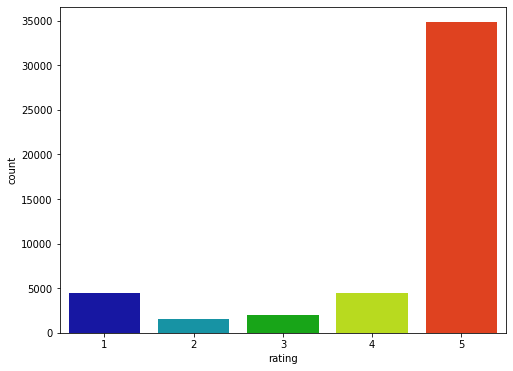

In [48]:
## Plot distribution of review scores
plt.figure(figsize=(8,6))
g = sns.countplot(data=review_df, x='rating', palette='nipy_spectral');

In [53]:
## Check which apps had so many reviews that they were
  ## so new that earliest review 
  ## doesn't go all the way back to March 2020
for app in review_df['app_name'].unique():
    
    earliest_rvw = min(review_df.loc[review_df['app_name']==app]['date'])
    
    if earliest_rvw > dt.datetime(2020, 3, 1): 
    
        print(f"""Earliest review for {app}: 
            {min(review_df.loc[review_df['app_name']==app]['date'])}\n""")

Earliest review for breathe2relax: 
            2020-03-19 17:11:28

Earliest review for breeze-mood-tracker-diary: 
            2020-03-18 00:19:17

Earliest review for cbt-thought-diary: 
            2020-03-01 06:32:16

Earliest review for dbt-coach: 
            2020-03-13 13:30:59

Earliest review for emoods-bipolar-mood-tracker: 
            2020-03-02 06:56:23

Earliest review for equoo-emotional-fitness-game: 
            2020-04-27 08:48:55

Earliest review for gg-ocd-thoughts-exercise: 
            2020-05-09 00:22:03

Earliest review for gg-self-care-be-a-better-you: 
            2020-04-02 20:09:36

Earliest review for gg-self-esteem-training-game: 
            2021-02-20 15:07:04

Earliest review for habitica-stay-motivated-gamified: 
            2020-03-03 10:12:47

Earliest review for happify-for-stress-worry: 
            2020-03-22 13:26:03

Earliest review for happyfeed: 
            2020-03-17 02:04:35

Earliest review for healthy-minds-program: 
            2020-03-

In [56]:
pd.options.display.max_rows = 65

In [57]:
temp_list = []

for app in review_df['app_name'].unique():
    
    app_slice = review_df.loc[review_df['app_name']==app].copy()
    
    cutoff_date = dt.datetime(2020, 2, 28)
    
    total_count = len(app_slice)
    
    count_from_Mar2020 = len(app_slice.loc[app_slice['date']>cutoff_date])
    
    earliest_rvw = min(app_slice['date'])
    
    temp_dict = {}
    temp_dict['app_name'] = app
    temp_dict['total_rvws'] = total_count
    temp_dict['rvws_since_Mar2020'] = count_from_Mar2020
    temp_dict['earliest_rvw'] = earliest_rvw
    
    temp_list.append(temp_dict)
    
app_Mar2020 = pd.DataFrame(temp_list)
app_Mar2020

,app_name,total_rvws,rvws_since_Mar2020,earliest_rvw
0,aloe-bud,73,73,2020-02-29 05:53:13
1,aura-meditation-sleep,1154,1154,2020-02-28 04:08:00
2,betterhelp-online-counseling,5935,5935,2020-02-28 00:06:47
3,breathe2relax,14,14,2020-03-19 17:11:28
4,breathwrk,2555,2555,2020-02-28 05:14:26
5,breethe-meditation-sleep,417,417,2020-02-28 22:22:40
6,breeze-mood-tracker-diary,260,260,2020-03-18 00:19:17
7,calm,5832,5832,2020-02-28 01:44:37
8,cbt-thought-diary,46,46,2020-03-01 06:32:16
9,daylio-journal,762,762,2020-02-28 05:01:12


In [58]:
client.close()